In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
sns.set()
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from matplotlib.image import imread
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from math import ceil,floor
import pickle
pd.set_option("display.max_columns",500)

In [50]:
df=pd.read_excel("electricity.xlsx")

In [51]:
df.head(8)

,House_Type,Household_Size_m2,Bedrooms,Year_Built,Occupants,Children,Teenagers,Adults,Elders,Full_Time_Worker,Part-Time_Worker,Graduate,PostGraduate,Education_Index,Income,Energy_Class,Date,Kwh/day
0,Apartment,36,1.0,0 - 5,1,0,0,1,0,1,0,1,0,0.944444,"10,001€ - 20,000€",Sometimes,2022-01-12,3.024000
1,Apartment,36,1.0,0 - 5,1,0,0,1,0,1,0,1,0,0.944444,"10,001€ - 20,000€",Sometimes,2021-09-09,2.788235
2,Apartment,95,2.0,6 - 15,4,1,1,2,0,2,0,2,1,0.972222,"άνω των 60,0001€",Often or Always,2021-01-14,11.520000
3,Apartment,95,2.0,6 - 15,4,1,1,2,0,2,0,2,1,0.972222,"άνω των 60,0001€",Often or Always,2021-09-12,9.504132
4,Apartment,80,2.0,6 - 15,3,1,0,2,0,2,0,2,1,0.972222,"40,000€ - 60,000€",Often or Always,2022-02-22,9.458333
5,Apartment,48,1.0,0 - 5,2,0,0,2,0,2,0,2,1,0.972222,"20,001€ - 40,000€",Rarely,2022-02-10,4.752066
6,Apartment,48,1.0,0 - 5,2,0,0,2,0,2,0,2,1,0.972222,"20,001€ - 40,000€",Rarely,2021-06-10,3.733333
7,Family House,92,2.0,30+,2,0,0,1,1,0,0,0,0,0.833333,"0 - 10,000€",Rarely,2022-01-20,12.793651


In [52]:
#df.columns=df.iloc[0]
#df=df[1:]

In [53]:
df.shape

(186, 18)

In [54]:
#df.reset_index(drop=True, inplace= True)
#df.head(30)

In [55]:
df.dtypes

House_Type                   object
Household_Size_m2             int64
Bedrooms                    float64
Year_Built                   object
Occupants                     int64
Children                      int64
Teenagers                     int64
Adults                        int64
Elders                        int64
Full_Time_Worker              int64
Part-Time_Worker              int64
Graduate                      int64
PostGraduate                  int64
Education_Index             float64
Income                       object
Energy_Class                 object
Date                 datetime64[ns]
Kwh/day                     float64
dtype: object

In [56]:
df.isnull().sum()

House_Type           0
Household_Size_m2    0
Bedrooms             3
Year_Built           0
Occupants            0
Children             0
Teenagers            0
Adults               0
Elders               0
Full_Time_Worker     0
Part-Time_Worker     0
Graduate             0
PostGraduate         0
Education_Index      0
Income               0
Energy_Class         0
Date                 0
Kwh/day              0
dtype: int64

In [57]:
df.dtypes

House_Type                   object
Household_Size_m2             int64
Bedrooms                    float64
Year_Built                   object
Occupants                     int64
Children                      int64
Teenagers                     int64
Adults                        int64
Elders                        int64
Full_Time_Worker              int64
Part-Time_Worker              int64
Graduate                      int64
PostGraduate                  int64
Education_Index             float64
Income                       object
Energy_Class                 object
Date                 datetime64[ns]
Kwh/day                     float64
dtype: object

In [58]:
#df['Household_Size_m2']=df['Household_Size_m2'].astype('int64')
#df['Occupants']=df['Occupants'].astype('int64')
#df['Children']=df['Children'].astype('int64')
#df['Adults']=df['Adults'].astype('int64')
#df['Teenagers']= df['Teenagers'].astype('int64')
#df['Elders']= df['Elders'].astype('int64')
#df['Full_Time_Worker']= df['Full_Time_Worker'].astype('int64')
#df['Part-Time_Worker']= df['Part-Time_Worker'].astype('int64')
#df['Graduate']= df['Graduate'].astype('int64')
#df['PostGraduate']= df['PostGraduate'].astype('int64')
#df['Education_Index']= df['Education_Index'].astype('float64')
#df['Kwh/day']= df['Kwh/day'].astype('float64')
#df['Date']=pd.to_datetime(df['Date'])
#df["House_Type"]=df["House_Type"].replace("Appartment","Apartment")

In [59]:
for i in df.columns:
    if i =="Date":
        print(f"{df[i].min()} and {df[i].max()}")

2020-08-07 00:00:00 and 2022-09-01 00:00:00


In [60]:

df.head(5)

,House_Type,Household_Size_m2,Bedrooms,Year_Built,Occupants,Children,Teenagers,Adults,Elders,Full_Time_Worker,Part-Time_Worker,Graduate,PostGraduate,Education_Index,Income,Energy_Class,Date,Kwh/day
0,Apartment,36,1.0,0 - 5,1,0,0,1,0,1,0,1,0,0.944444,"10,001€ - 20,000€",Sometimes,2022-01-12,3.024000
1,Apartment,36,1.0,0 - 5,1,0,0,1,0,1,0,1,0,0.944444,"10,001€ - 20,000€",Sometimes,2021-09-09,2.788235
2,Apartment,95,2.0,6 - 15,4,1,1,2,0,2,0,2,1,0.972222,"άνω των 60,0001€",Often or Always,2021-01-14,11.520000
3,Apartment,95,2.0,6 - 15,4,1,1,2,0,2,0,2,1,0.972222,"άνω των 60,0001€",Often or Always,2021-09-12,9.504132
4,Apartment,80,2.0,6 - 15,3,1,0,2,0,2,0,2,1,0.972222,"40,000€ - 60,000€",Often or Always,2022-02-22,9.458333


In [61]:


df.dtypes

House_Type                   object
Household_Size_m2             int64
Bedrooms                    float64
Year_Built                   object
Occupants                     int64
Children                      int64
Teenagers                     int64
Adults                        int64
Elders                        int64
Full_Time_Worker              int64
Part-Time_Worker              int64
Graduate                      int64
PostGraduate                  int64
Education_Index             float64
Income                       object
Energy_Class                 object
Date                 datetime64[ns]
Kwh/day                     float64
dtype: object

In [62]:
df['Year_Built'].unique()

array(['0 - 5', '6 - 15', '30+', '16 - 30'], dtype=object)

In [63]:
train,test=train_test_split(df,test_size=0.3,random_state=123)

In [64]:
train.head(10)

,House_Type,Household_Size_m2,Bedrooms,Year_Built,Occupants,Children,Teenagers,Adults,Elders,Full_Time_Worker,Part-Time_Worker,Graduate,PostGraduate,Education_Index,Income,Energy_Class,Date,Kwh/day
20,Apartment,85,2.0,0 - 5,1,0,0,1,0,1,0,1,1,1.000000,"10,001€ - 20,000€",Sometimes,2022-02-28,25.862069
158,Apartment,75,2.0,6 - 15,3,0,0,1,2,0,0,2,0,0.907407,"0 - 10,000€",Rarely,2022-01-27,5.826446
28,Apartment,103,3.0,6 - 15,4,1,1,2,0,2,0,2,1,0.972222,"20,001€ - 40,000€",Often or Always,2021-12-13,15.105769
13,Apartment,94,3.0,0 - 5,5,0,3,2,0,2,1,2,0,0.944444,"20,001€ - 40,000€",Often or Always,2022-03-14,31.322034
104,Semidetached,255,4.0,6 - 15,3,1,0,2,0,2,0,2,1,0.972222,"20,001€ - 40,000€",Sometimes,2021-09-26,15.293103
24,Apartment,95,2.0,6 - 15,2,0,0,2,0,2,0,2,1,0.972222,"20,001€ - 40,000€",Often or Always,2021-01-21,12.442748
133,Apartment,80,3.0,16 - 30,5,0,1,4,0,1,1,2,1,0.902778,"10,001€ - 20,000€",Sometimes,2021-06-29,5.833333
93,Apartment,86,4.0,30+,1,0,0,1,0,0,0,0,0,0.833333,"0 - 10,000€",Often or Always,2022-03-07,10.159664
117,Apartment,87,2.0,6 - 15,4,0,0,4,0,4,0,4,2,0.972222,"20,001€ - 40,000€",Often or Always,2021-10-20,13.200000
116,Apartment,87,2.0,6 - 15,4,0,0,4,0,4,0,4,2,0.972222,"20,001€ - 40,000€",Often or Always,2022-02-20,12.000000


In [65]:
train.shape

(130, 18)

## Action 1

In [66]:
train.reset_index(drop=True, inplace=True)
train.head(10)

,House_Type,Household_Size_m2,Bedrooms,Year_Built,Occupants,Children,Teenagers,Adults,Elders,Full_Time_Worker,Part-Time_Worker,Graduate,PostGraduate,Education_Index,Income,Energy_Class,Date,Kwh/day
0,Apartment,85,2.0,0 - 5,1,0,0,1,0,1,0,1,1,1.000000,"10,001€ - 20,000€",Sometimes,2022-02-28,25.862069
1,Apartment,75,2.0,6 - 15,3,0,0,1,2,0,0,2,0,0.907407,"0 - 10,000€",Rarely,2022-01-27,5.826446
2,Apartment,103,3.0,6 - 15,4,1,1,2,0,2,0,2,1,0.972222,"20,001€ - 40,000€",Often or Always,2021-12-13,15.105769
3,Apartment,94,3.0,0 - 5,5,0,3,2,0,2,1,2,0,0.944444,"20,001€ - 40,000€",Often or Always,2022-03-14,31.322034
4,Semidetached,255,4.0,6 - 15,3,1,0,2,0,2,0,2,1,0.972222,"20,001€ - 40,000€",Sometimes,2021-09-26,15.293103
5,Apartment,95,2.0,6 - 15,2,0,0,2,0,2,0,2,1,0.972222,"20,001€ - 40,000€",Often or Always,2021-01-21,12.442748
6,Apartment,80,3.0,16 - 30,5,0,1,4,0,1,1,2,1,0.902778,"10,001€ - 20,000€",Sometimes,2021-06-29,5.833333
7,Apartment,86,4.0,30+,1,0,0,1,0,0,0,0,0,0.833333,"0 - 10,000€",Often or Always,2022-03-07,10.159664
8,Apartment,87,2.0,6 - 15,4,0,0,4,0,4,0,4,2,0.972222,"20,001€ - 40,000€",Often or Always,2021-10-20,13.200000
9,Apartment,87,2.0,6 - 15,4,0,0,4,0,4,0,4,2,0.972222,"20,001€ - 40,000€",Often or Always,2022-02-20,12.000000


In [67]:
for i in train.columns:
    if train[i].dtypes=='float64':
        print(f"{i} has {train[i].nunique()} categories,\n and the categoriesare{train[i].unique()}")

Bedrooms has 6 categories,
 and the categoriesare[ 2.  3.  4.  1.  5.  6. nan]
Education_Index has 13 categories,
 and the categoriesare[1.         0.90740741 0.97222222 0.94444444 0.90277778 0.83333333
 0.88888889 0.86111111 0.91666667 0.92592593 0.96296296 0.87037037
 0.875     ]
Kwh/day has 127 categories,
 and the categoriesare[2.58620690e+01 5.82644628e+00 1.51057692e+01 3.13220339e+01
 1.52931035e+01 1.24427481e+01 5.83333333e+00 1.01596639e+01
 1.32000000e+01 1.20000000e+01 7.89430894e+00 5.05932203e+00
 1.27936508e+01 2.76859504e+01 1.48571429e+00 1.19401709e+01
 1.74836066e+01 7.97656250e+00 3.02400000e+00 1.03223140e+01
 4.00000000e+01 1.11570248e+01 2.25163934e+01 6.73809524e+01
 1.91549296e+01 1.16666667e+01 4.75206612e+00 1.38347107e+01
 1.12727273e+01 4.46808511e+00 1.37704918e+01 2.75806452e+00
 3.27642276e+00 1.43250000e+01 3.81578947e+00 3.82400000e+00
 1.19338843e+01 1.69186992e+01 1.56475410e+01 8.35245902e+00
 7.73684211e+00 5.39534884e+00 3.73333333e+00 1.47723577e

In [68]:
for i in train.columns:
    if train[i].dtypes=='int64':
        print(f"{i} has {train[i].nunique()} categories\n and the categories are:{train[i].unique()}")

Household_Size_m2 has 56 categories
 and the categories are:[ 85  75 103  94 255  95  80  86  87 100  56  92  65 116 190  70  36 107
 180  48 142  90  49  64  50  57  84  62 117 140 122 165 225 110 400  77
 120  45  35  82 112  68 186  54  25  88 115 200 198  66 240  60 360 350
  93 220]
Occupants has 6 categories
 and the categories are:[1 3 4 5 2 6]
Children has 4 categories
 and the categories are:[0 1 2 3]
Teenagers has 4 categories
 and the categories are:[0 1 3 2]
Adults has 6 categories
 and the categories are:[1 2 4 3 0 5]
Elders has 3 categories
 and the categories are:[0 2 1]
Full_Time_Worker has 5 categories
 and the categories are:[1 0 2 4 3]
Part-Time_Worker has 3 categories
 and the categories are:[0 1 2]
Graduate has 5 categories
 and the categories are:[1 2 0 4 3]
PostGraduate has 3 categories
 and the categories are:[1 0 2]


In [69]:
for i in train.columns:
    if train[i].dtypes=='O':
        print(f"{i} has {train[i].nunique()} categories,\n and the categoriesare{train[i].unique()}")

House_Type has 4 categories,
 and the categoriesare['Apartment' 'Semidetached' 'Townhome' 'Family House']
Year_Built has 4 categories,
 and the categoriesare['0 - 5' '6 - 15' '16 - 30' '30+']
Income has 5 categories,
 and the categoriesare['10,001€ - 20,000€' '0 - 10,000€' '20,001€ - 40,000€' '40,000€ - 60,000€'
 'άνω των 60,0001€']
Energy_Class has 3 categories,
 and the categoriesare['Sometimes' 'Rarely' 'Often or Always']


In [70]:
train.head(20)

,House_Type,Household_Size_m2,Bedrooms,Year_Built,Occupants,Children,Teenagers,Adults,Elders,Full_Time_Worker,Part-Time_Worker,Graduate,PostGraduate,Education_Index,Income,Energy_Class,Date,Kwh/day
0,Apartment,85,2.0,0 - 5,1,0,0,1,0,1,0,1,1,1.000000,"10,001€ - 20,000€",Sometimes,2022-02-28,25.862069
1,Apartment,75,2.0,6 - 15,3,0,0,1,2,0,0,2,0,0.907407,"0 - 10,000€",Rarely,2022-01-27,5.826446
2,Apartment,103,3.0,6 - 15,4,1,1,2,0,2,0,2,1,0.972222,"20,001€ - 40,000€",Often or Always,2021-12-13,15.105769
3,Apartment,94,3.0,0 - 5,5,0,3,2,0,2,1,2,0,0.944444,"20,001€ - 40,000€",Often or Always,2022-03-14,31.322034
4,Semidetached,255,4.0,6 - 15,3,1,0,2,0,2,0,2,1,0.972222,"20,001€ - 40,000€",Sometimes,2021-09-26,15.293103
5,Apartment,95,2.0,6 - 15,2,0,0,2,0,2,0,2,1,0.972222,"20,001€ - 40,000€",Often or Always,2021-01-21,12.442748
6,Apartment,80,3.0,16 - 30,5,0,1,4,0,1,1,2,1,0.902778,"10,001€ - 20,000€",Sometimes,2021-06-29,5.833333
7,Apartment,86,4.0,30+,1,0,0,1,0,0,0,0,0,0.833333,"0 - 10,000€",Often or Always,2022-03-07,10.159664
8,Apartment,87,2.0,6 - 15,4,0,0,4,0,4,0,4,2,0.972222,"20,001€ - 40,000€",Often or Always,2021-10-20,13.200000
9,Apartment,87,2.0,6 - 15,4,0,0,4,0,4,0,4,2,0.972222,"20,001€ - 40,000€",Often or Always,2022-02-20,12.000000


In [71]:
train.isnull().sum()

House_Type           0
Household_Size_m2    0
Bedrooms             1
Year_Built           0
Occupants            0
Children             0
Teenagers            0
Adults               0
Elders               0
Full_Time_Worker     0
Part-Time_Worker     0
Graduate             0
PostGraduate         0
Education_Index      0
Income               0
Energy_Class         0
Date                 0
Kwh/day              0
dtype: int64



## Action 2

In [72]:
train.dropna(inplace=True)

In [73]:
train.duplicated().sum()

3

## Action 3

In [74]:
train.drop_duplicates(keep='first',inplace=True)
train.reset_index(drop=True,inplace=True)
train.head()

,House_Type,Household_Size_m2,Bedrooms,Year_Built,Occupants,Children,Teenagers,Adults,Elders,Full_Time_Worker,Part-Time_Worker,Graduate,PostGraduate,Education_Index,Income,Energy_Class,Date,Kwh/day
0,Apartment,85,2.0,0 - 5,1,0,0,1,0,1,0,1,1,1.000000,"10,001€ - 20,000€",Sometimes,2022-02-28,25.862069
1,Apartment,75,2.0,6 - 15,3,0,0,1,2,0,0,2,0,0.907407,"0 - 10,000€",Rarely,2022-01-27,5.826446
2,Apartment,103,3.0,6 - 15,4,1,1,2,0,2,0,2,1,0.972222,"20,001€ - 40,000€",Often or Always,2021-12-13,15.105769
3,Apartment,94,3.0,0 - 5,5,0,3,2,0,2,1,2,0,0.944444,"20,001€ - 40,000€",Often or Always,2022-03-14,31.322034
4,Semidetached,255,4.0,6 - 15,3,1,0,2,0,2,0,2,1,0.972222,"20,001€ - 40,000€",Sometimes,2021-09-26,15.293103


In [75]:

train.isnull().sum()

House_Type           0
Household_Size_m2    0
Bedrooms             0
Year_Built           0
Occupants            0
Children             0
Teenagers            0
Adults               0
Elders               0
Full_Time_Worker     0
Part-Time_Worker     0
Graduate             0
PostGraduate         0
Education_Index      0
Income               0
Energy_Class         0
Date                 0
Kwh/day              0
dtype: int64

In [76]:
train['Income'].unique()

array(['10,001€ - 20,000€', '0 - 10,000€', '20,001€ - 40,000€',
       '40,000€ - 60,000€', 'άνω των 60,0001€'], dtype=object)

In [77]:
train.dtypes


House_Type                   object
Household_Size_m2             int64
Bedrooms                    float64
Year_Built                   object
Occupants                     int64
Children                      int64
Teenagers                     int64
Adults                        int64
Elders                        int64
Full_Time_Worker              int64
Part-Time_Worker              int64
Graduate                      int64
PostGraduate                  int64
Education_Index             float64
Income                       object
Energy_Class                 object
Date                 datetime64[ns]
Kwh/day                     float64
dtype: object

In [78]:
train['Bedrooms'].unique()

array([2., 3., 4., 1., 5., 6.])

## Action 4

In [79]:
train['Bedrooms']=train['Bedrooms'].astype('int64')

In [80]:
train['Year_Built'].unique()

array(['0 - 5', '6 - 15', '16 - 30', '30+'], dtype=object)

In [81]:
train['Income'].unique()

array(['10,001€ - 20,000€', '0 - 10,000€', '20,001€ - 40,000€',
       '40,000€ - 60,000€', 'άνω των 60,0001€'], dtype=object)

## Action 5

In [82]:
#train['Year_Built']=train['Year_Built'].str.replace("30+","30")
#train['Year_Built']=train['Year_Built'].str.replace("+","")
#train['Year_Built']=train['Year_Built'].str.replace("16 - 31 - 36","16 - 30")
train['Income']=train['Income'].str.replace('€','')
train["Income"]=train["Income"].str.replace('άνω των','')
train['Income']=train['Income'].str.replace(',','')
train['Income']=train['Income'].str.replace('600001','600001')
train['Income']=train['Income'].str.replace(' 600001','600001')







In [83]:
train['Income'].unique()

array(['10001 - 20000', '0 - 10000', '20001 - 40000', '40000 - 60000',
       '600001'], dtype=object)

In [84]:
train.head(15)

,House_Type,Household_Size_m2,Bedrooms,Year_Built,Occupants,Children,Teenagers,Adults,Elders,Full_Time_Worker,Part-Time_Worker,Graduate,PostGraduate,Education_Index,Income,Energy_Class,Date,Kwh/day
0,Apartment,85,2,0 - 5,1,0,0,1,0,1,0,1,1,1.000000,10001 - 20000,Sometimes,2022-02-28,25.862069
1,Apartment,75,2,6 - 15,3,0,0,1,2,0,0,2,0,0.907407,0 - 10000,Rarely,2022-01-27,5.826446
2,Apartment,103,3,6 - 15,4,1,1,2,0,2,0,2,1,0.972222,20001 - 40000,Often or Always,2021-12-13,15.105769
3,Apartment,94,3,0 - 5,5,0,3,2,0,2,1,2,0,0.944444,20001 - 40000,Often or Always,2022-03-14,31.322034
4,Semidetached,255,4,6 - 15,3,1,0,2,0,2,0,2,1,0.972222,20001 - 40000,Sometimes,2021-09-26,15.293103
5,Apartment,95,2,6 - 15,2,0,0,2,0,2,0,2,1,0.972222,20001 - 40000,Often or Always,2021-01-21,12.442748
6,Apartment,80,3,16 - 30,5,0,1,4,0,1,1,2,1,0.902778,10001 - 20000,Sometimes,2021-06-29,5.833333
7,Apartment,86,4,30+,1,0,0,1,0,0,0,0,0,0.833333,0 - 10000,Often or Always,2022-03-07,10.159664
8,Apartment,87,2,6 - 15,4,0,0,4,0,4,0,4,2,0.972222,20001 - 40000,Often or Always,2021-10-20,13.200000
9,Apartment,87,2,6 - 15,4,0,0,4,0,4,0,4,2,0.972222,20001 - 40000,Often or Always,2022-02-20,12.000000


In [85]:
train.dtypes

House_Type                   object
Household_Size_m2             int64
Bedrooms                      int64
Year_Built                   object
Occupants                     int64
Children                      int64
Teenagers                     int64
Adults                        int64
Elders                        int64
Full_Time_Worker              int64
Part-Time_Worker              int64
Graduate                      int64
PostGraduate                  int64
Education_Index             float64
Income                       object
Energy_Class                 object
Date                 datetime64[ns]
Kwh/day                     float64
dtype: object

In [86]:
train.isnull().sum()

House_Type           0
Household_Size_m2    0
Bedrooms             0
Year_Built           0
Occupants            0
Children             0
Teenagers            0
Adults               0
Elders               0
Full_Time_Worker     0
Part-Time_Worker     0
Graduate             0
PostGraduate         0
Education_Index      0
Income               0
Energy_Class         0
Date                 0
Kwh/day              0
dtype: int64

In [87]:
train.head()

,House_Type,Household_Size_m2,Bedrooms,Year_Built,Occupants,Children,Teenagers,Adults,Elders,Full_Time_Worker,Part-Time_Worker,Graduate,PostGraduate,Education_Index,Income,Energy_Class,Date,Kwh/day
0,Apartment,85,2,0 - 5,1,0,0,1,0,1,0,1,1,1.000000,10001 - 20000,Sometimes,2022-02-28,25.862069
1,Apartment,75,2,6 - 15,3,0,0,1,2,0,0,2,0,0.907407,0 - 10000,Rarely,2022-01-27,5.826446
2,Apartment,103,3,6 - 15,4,1,1,2,0,2,0,2,1,0.972222,20001 - 40000,Often or Always,2021-12-13,15.105769
3,Apartment,94,3,0 - 5,5,0,3,2,0,2,1,2,0,0.944444,20001 - 40000,Often or Always,2022-03-14,31.322034
4,Semidetached,255,4,6 - 15,3,1,0,2,0,2,0,2,1,0.972222,20001 - 40000,Sometimes,2021-09-26,15.293103


In [88]:
train.duplicated().sum()

0

In [89]:
train.dtypes

House_Type                   object
Household_Size_m2             int64
Bedrooms                      int64
Year_Built                   object
Occupants                     int64
Children                      int64
Teenagers                     int64
Adults                        int64
Elders                        int64
Full_Time_Worker              int64
Part-Time_Worker              int64
Graduate                      int64
PostGraduate                  int64
Education_Index             float64
Income                       object
Energy_Class                 object
Date                 datetime64[ns]
Kwh/day                     float64
dtype: object

In [90]:
train.head()

,House_Type,Household_Size_m2,Bedrooms,Year_Built,Occupants,Children,Teenagers,Adults,Elders,Full_Time_Worker,Part-Time_Worker,Graduate,PostGraduate,Education_Index,Income,Energy_Class,Date,Kwh/day
0,Apartment,85,2,0 - 5,1,0,0,1,0,1,0,1,1,1.000000,10001 - 20000,Sometimes,2022-02-28,25.862069
1,Apartment,75,2,6 - 15,3,0,0,1,2,0,0,2,0,0.907407,0 - 10000,Rarely,2022-01-27,5.826446
2,Apartment,103,3,6 - 15,4,1,1,2,0,2,0,2,1,0.972222,20001 - 40000,Often or Always,2021-12-13,15.105769
3,Apartment,94,3,0 - 5,5,0,3,2,0,2,1,2,0,0.944444,20001 - 40000,Often or Always,2022-03-14,31.322034
4,Semidetached,255,4,6 - 15,3,1,0,2,0,2,0,2,1,0.972222,20001 - 40000,Sometimes,2021-09-26,15.293103


In [91]:
train['Income'].unique()

array(['10001 - 20000', '0 - 10000', '20001 - 40000', '40000 - 60000',
       '600001'], dtype=object)

## Action 6

In [92]:
train['Month_of_year']=train['Date'].dt.month
train['Day_of_Month']=train['Date'].dt.day
train['Is_weekend']=train['Date'].dt.dayofweek.isin([5,6]).astype('int64')
train['Kwh/day']=round(train['Kwh/day'],2)
train['Energy_usage_per_person']=round(train['Kwh/day']/train['Occupants'],2)

train.head(10)


,House_Type,Household_Size_m2,Bedrooms,Year_Built,Occupants,Children,Teenagers,Adults,Elders,Full_Time_Worker,Part-Time_Worker,Graduate,PostGraduate,Education_Index,Income,Energy_Class,Date,Kwh/day,Month_of_year,Day_of_Month,Is_weekend,Energy_usage_per_person
0,Apartment,85,2,0 - 5,1,0,0,1,0,1,0,1,1,1.000000,10001 - 20000,Sometimes,2022-02-28,25.86,2,28,0,25.86
1,Apartment,75,2,6 - 15,3,0,0,1,2,0,0,2,0,0.907407,0 - 10000,Rarely,2022-01-27,5.83,1,27,0,1.94
2,Apartment,103,3,6 - 15,4,1,1,2,0,2,0,2,1,0.972222,20001 - 40000,Often or Always,2021-12-13,15.11,12,13,0,3.78
3,Apartment,94,3,0 - 5,5,0,3,2,0,2,1,2,0,0.944444,20001 - 40000,Often or Always,2022-03-14,31.32,3,14,0,6.26
4,Semidetached,255,4,6 - 15,3,1,0,2,0,2,0,2,1,0.972222,20001 - 40000,Sometimes,2021-09-26,15.29,9,26,1,5.10
5,Apartment,95,2,6 - 15,2,0,0,2,0,2,0,2,1,0.972222,20001 - 40000,Often or Always,2021-01-21,12.44,1,21,0,6.22
6,Apartment,80,3,16 - 30,5,0,1,4,0,1,1,2,1,0.902778,10001 - 20000,Sometimes,2021-06-29,5.83,6,29,0,1.17
7,Apartment,86,4,30+,1,0,0,1,0,0,0,0,0,0.833333,0 - 10000,Often or Always,2022-03-07,10.16,3,7,0,10.16
8,Apartment,87,2,6 - 15,4,0,0,4,0,4,0,4,2,0.972222,20001 - 40000,Often or Always,2021-10-20,13.20,10,20,0,3.30
9,Apartment,87,2,6 - 15,4,0,0,4,0,4,0,4,2,0.972222,20001 - 40000,Often or Always,2022-02-20,12.00,2,20,1,3.00


In [93]:
train.duplicated().sum()

0

## Action 7

In [94]:
train['Education_Index']= round(train['Education_Index'],2)
train['Employment rate']= round((train['Full_Time_Worker'] + train['Part-Time_Worker'])/train['Occupants'],2)


train.head(20)

,House_Type,Household_Size_m2,Bedrooms,Year_Built,Occupants,Children,Teenagers,Adults,Elders,Full_Time_Worker,Part-Time_Worker,Graduate,PostGraduate,Education_Index,Income,Energy_Class,Date,Kwh/day,Month_of_year,Day_of_Month,Is_weekend,Energy_usage_per_person,Employment rate
0,Apartment,85,2,0 - 5,1,0,0,1,0,1,0,1,1,1.00,10001 - 20000,Sometimes,2022-02-28,25.86,2,28,0,25.86,1.00
1,Apartment,75,2,6 - 15,3,0,0,1,2,0,0,2,0,0.91,0 - 10000,Rarely,2022-01-27,5.83,1,27,0,1.94,0.00
2,Apartment,103,3,6 - 15,4,1,1,2,0,2,0,2,1,0.97,20001 - 40000,Often or Always,2021-12-13,15.11,12,13,0,3.78,0.50
3,Apartment,94,3,0 - 5,5,0,3,2,0,2,1,2,0,0.94,20001 - 40000,Often or Always,2022-03-14,31.32,3,14,0,6.26,0.60
4,Semidetached,255,4,6 - 15,3,1,0,2,0,2,0,2,1,0.97,20001 - 40000,Sometimes,2021-09-26,15.29,9,26,1,5.10,0.67
5,Apartment,95,2,6 - 15,2,0,0,2,0,2,0,2,1,0.97,20001 - 40000,Often or Always,2021-01-21,12.44,1,21,0,6.22,1.00
6,Apartment,80,3,16 - 30,5,0,1,4,0,1,1,2,1,0.90,10001 - 20000,Sometimes,2021-06-29,5.83,6,29,0,1.17,0.40
7,Apartment,86,4,30+,1,0,0,1,0,0,0,0,0,0.83,0 - 10000,Often or Always,2022-03-07,10.16,3,7,0,10.16,0.00
8,Apartment,87,2,6 - 15,4,0,0,4,0,4,0,4,2,0.97,20001 - 40000,Often or Always,2021-10-20,13.20,10,20,0,3.30,1.00
9,Apartment,87,2,6 - 15,4,0,0,4,0,4,0,4,2,0.97,20001 - 40000,Often or Always,2022-02-20,12.00,2,20,1,3.00,1.00


In [95]:
train.shape

(126, 23)

In [96]:
train['Occupants'].unique()

array([1, 3, 4, 5, 2, 6], dtype=int64)

In [97]:
train.dtypes

House_Type                         object
Household_Size_m2                   int64
Bedrooms                            int64
Year_Built                         object
Occupants                           int64
Children                            int64
Teenagers                           int64
Adults                              int64
Elders                              int64
Full_Time_Worker                    int64
Part-Time_Worker                    int64
Graduate                            int64
PostGraduate                        int64
Education_Index                   float64
Income                             object
Energy_Class                       object
Date                       datetime64[ns]
Kwh/day                           float64
Month_of_year                       int64
Day_of_Month                        int64
Is_weekend                          int64
Energy_usage_per_person           float64
Employment rate                   float64
dtype: object

In [98]:
train.duplicated().sum()

0

C:\Users\emmanul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Kwh/day'>

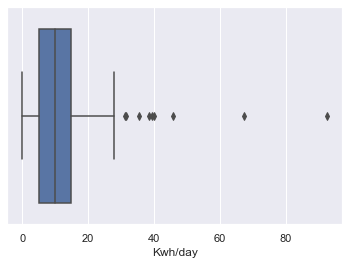

In [99]:
sns.boxplot(train['Kwh/day'])

C:\Users\emmanul\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Kwh/day', ylabel='Density'>

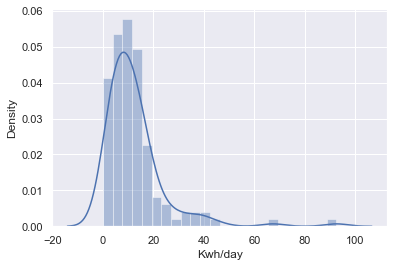

In [100]:
sns.distplot(train['Kwh/day'])

## Action 8

In [101]:
def cap_outlier(data,var):
    q1,q3=np.percentile(data[var],[25,75])
    iqr=q3-q1
    lower=q1-1.5*iqr
    upper=q3+1.5*iqr
    
    data[var].values[data[var].values>upper]=upper
    data[var].values[data[var].values<lower]=lower
    data.reset_index(drop=True,inplace=True)
    return data

In [102]:
train = cap_outlier(train,'Kwh/day')

C:\Users\emmanul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Kwh/day'>

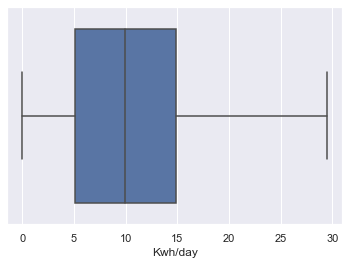

In [103]:
sns.boxplot(train['Kwh/day'])

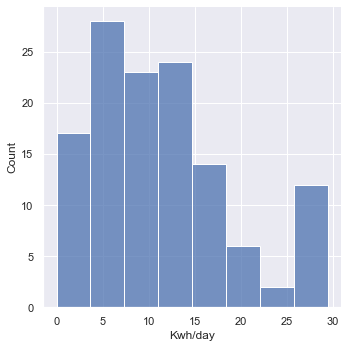

In [104]:
sns.displot(train['Kwh/day'])

C:\Users\emmanul\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Kwh/day', ylabel='Density'>

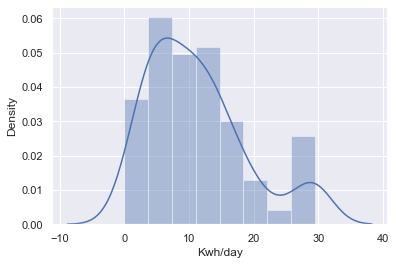

In [105]:
sns.distplot(train['Kwh/day'])

In [106]:
train.duplicated().sum()

0

## Action 9

In [107]:
X_train=train.drop(['Kwh/day','Date'], axis=1)
y_train=train['Kwh/day']

In [108]:
X_train.head(5)

,House_Type,Household_Size_m2,Bedrooms,Year_Built,Occupants,Children,Teenagers,Adults,Elders,Full_Time_Worker,Part-Time_Worker,Graduate,PostGraduate,Education_Index,Income,Energy_Class,Month_of_year,Day_of_Month,Is_weekend,Energy_usage_per_person,Employment rate
0,Apartment,85,2,0 - 5,1,0,0,1,0,1,0,1,1,1.00,10001 - 20000,Sometimes,2,28,0,25.86,1.00
1,Apartment,75,2,6 - 15,3,0,0,1,2,0,0,2,0,0.91,0 - 10000,Rarely,1,27,0,1.94,0.00
2,Apartment,103,3,6 - 15,4,1,1,2,0,2,0,2,1,0.97,20001 - 40000,Often or Always,12,13,0,3.78,0.50
3,Apartment,94,3,0 - 5,5,0,3,2,0,2,1,2,0,0.94,20001 - 40000,Often or Always,3,14,0,6.26,0.60
4,Semidetached,255,4,6 - 15,3,1,0,2,0,2,0,2,1,0.97,20001 - 40000,Sometimes,9,26,1,5.10,0.67


In [109]:
X_train.shape

(126, 21)

In [110]:
category=[]
for i in X_train.columns:
    if X_train[i].dtype == 'O':
        category.append(i)
category

['House_Type', 'Year_Built', 'Income', 'Energy_Class']

## Action 10

In [111]:
#p=np.array(X_train['House_Type'])
#p=p.reshape(-1,1)

#f=np.array(X_train['Year_Built'])
#f=f.reshape(-1,1)

#b=np.array(X_train['Income'])
#b=b.reshape(-1,1)

#a=np.array(X_train['Energy_Class'])
#a=a.reshape(-1,1)

In [112]:
X_train['Year_Built'].unique()

array(['0 - 5', '6 - 15', '16 - 30', '30+'], dtype=object)

In [113]:
X_train['Income'].unique()

array(['10001 - 20000', '0 - 10000', '20001 - 40000', '40000 - 60000',
       '600001'], dtype=object)

## Action 11

In [114]:
Hou_type=['Apartment', 'Semidetached', 'Townhome', 'Family House']

Year_buit=['0 - 5', '6 - 15', '16 - 30', '30+']

Inc_typ=['10001 - 20000', '0 - 10000', '20001 - 40000', '40000 - 60000','600001']


Ene_cls=['Sometimes', 'Rarely', 'Often or Always']


## Action 12

In [115]:
encoder= OrdinalEncoder()

X_train[category]=encoder.fit_transform(X_train[category])
#X_train['House_Type']=pd.DataFrame(encoder.fit_transform(X_train[category]))

#encoder= OrdinalEncoder(categories=[Year_buit],dtype='int64')
#X_train['Year_Built']=pd.DataFrame(encoder.fit_transform(X_train[category]))

#encoder= OrdinalEncoder(categories=[Inc_typ],dtype='int64')
#X_train['Income']=pd.DataFrame(encoder.fit_transform(X_train[category]))

#encoder= OrdinalEncoder(categories=[Ene_cls],dtype='int64')
#X_train['Energy_Class']=pd.DataFrame(encoder.fit_transform(X_train[category]))

#A8
#encoder = OneHotEncoder(drop='first',dtype=int)

#enc_data = pd.DataFrame(encoder.fit_transform(X_train[category]).toarray())
#enc_data.columns = encoder.get_feature_names_out()

#X_train = X_train.join(enc_data)

#X_train.drop(category, axis=1,inplace=True)





In [116]:
X_train.head(20)

,House_Type,Household_Size_m2,Bedrooms,Year_Built,Occupants,Children,Teenagers,Adults,Elders,Full_Time_Worker,Part-Time_Worker,Graduate,PostGraduate,Education_Index,Income,Energy_Class,Month_of_year,Day_of_Month,Is_weekend,Energy_usage_per_person,Employment rate
0,0.0,85,2,0.0,1,0,0,1,0,1,0,1,1,1.00,1.0,2.0,2,28,0,25.86,1.00
1,0.0,75,2,3.0,3,0,0,1,2,0,0,2,0,0.91,0.0,1.0,1,27,0,1.94,0.00
2,0.0,103,3,3.0,4,1,1,2,0,2,0,2,1,0.97,2.0,0.0,12,13,0,3.78,0.50
3,0.0,94,3,0.0,5,0,3,2,0,2,1,2,0,0.94,2.0,0.0,3,14,0,6.26,0.60
4,2.0,255,4,3.0,3,1,0,2,0,2,0,2,1,0.97,2.0,2.0,9,26,1,5.10,0.67
5,0.0,95,2,3.0,2,0,0,2,0,2,0,2,1,0.97,2.0,0.0,1,21,0,6.22,1.00
6,0.0,80,3,1.0,5,0,1,4,0,1,1,2,1,0.90,1.0,2.0,6,29,0,1.17,0.40
7,0.0,86,4,2.0,1,0,0,1,0,0,0,0,0,0.83,0.0,0.0,3,7,0,10.16,0.00
8,0.0,87,2,3.0,4,0,0,4,0,4,0,4,2,0.97,2.0,0.0,10,20,0,3.30,1.00
9,0.0,87,2,3.0,4,0,0,4,0,4,0,4,2,0.97,2.0,0.0,2,20,1,3.00,1.00


In [117]:
X_train.shape

(126, 21)

In [118]:
X_train.isnull().sum()

House_Type                 0
Household_Size_m2          0
Bedrooms                   0
Year_Built                 0
Occupants                  0
Children                   0
Teenagers                  0
Adults                     0
Elders                     0
Full_Time_Worker           0
Part-Time_Worker           0
Graduate                   0
PostGraduate               0
Education_Index            0
Income                     0
Energy_Class               0
Month_of_year              0
Day_of_Month               0
Is_weekend                 0
Energy_usage_per_person    0
Employment rate            0
dtype: int64

In [119]:
X_train.duplicated().sum()

0

In [120]:
col2=X_train.columns

In [121]:
col2

Index(['House_Type', 'Household_Size_m2', 'Bedrooms', 'Year_Built',
       'Occupants', 'Children', 'Teenagers', 'Adults', 'Elders',
       'Full_Time_Worker', 'Part-Time_Worker', 'Graduate', 'PostGraduate',
       'Education_Index', 'Income', 'Energy_Class', 'Month_of_year',
       'Day_of_Month', 'Is_weekend', 'Energy_usage_per_person',
       'Employment rate'],
      dtype='object')

In [122]:
X_train.dtypes

House_Type                 float64
Household_Size_m2            int64
Bedrooms                     int64
Year_Built                 float64
Occupants                    int64
Children                     int64
Teenagers                    int64
Adults                       int64
Elders                       int64
Full_Time_Worker             int64
Part-Time_Worker             int64
Graduate                     int64
PostGraduate                 int64
Education_Index            float64
Income                     float64
Energy_Class               float64
Month_of_year                int64
Day_of_Month                 int64
Is_weekend                   int64
Energy_usage_per_person    float64
Employment rate            float64
dtype: object

## Action 13

In [123]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)


In [124]:
X_train = pd.DataFrame(X_train, columns=col2)
X_train

,House_Type,Household_Size_m2,Bedrooms,Year_Built,Occupants,Children,Teenagers,Adults,Elders,Full_Time_Worker,Part-Time_Worker,Graduate,PostGraduate,Education_Index,Income,Energy_Class,Month_of_year,Day_of_Month,Is_weekend,Energy_usage_per_person,Employment rate
0,0.000000,0.160000,0.2,0.000000,0.0,0.000000,0.000000,0.2,0.0,0.25,0.0,0.25,0.5,1.000000,0.25,1.0,0.090909,0.900000,0.0,0.767587,1.00
1,0.000000,0.133333,0.2,1.000000,0.4,0.000000,0.000000,0.2,1.0,0.00,0.0,0.50,0.0,0.470588,0.00,0.5,0.000000,0.866667,0.0,0.057584,0.00
2,0.000000,0.208000,0.4,1.000000,0.6,0.333333,0.333333,0.4,0.0,0.50,0.0,0.50,0.5,0.823529,0.50,0.0,1.000000,0.400000,0.0,0.112199,0.50
3,0.000000,0.184000,0.4,0.000000,0.8,0.000000,1.000000,0.4,0.0,0.50,0.5,0.50,0.0,0.647059,0.50,0.0,0.181818,0.433333,0.0,0.185812,0.60
4,0.666667,0.613333,0.6,1.000000,0.4,0.333333,0.000000,0.4,0.0,0.50,0.0,0.50,0.5,0.823529,0.50,1.0,0.727273,0.833333,1.0,0.151380,0.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,0.000000,0.053333,0.0,0.666667,0.0,0.000000,0.000000,0.2,0.0,0.00,0.0,0.25,0.0,0.647059,0.00,1.0,0.090909,0.733333,0.0,0.041259,0.00
122,0.000000,0.066667,0.0,1.000000,0.0,0.000000,0.000000,0.2,0.0,0.25,0.0,0.25,0.0,0.647059,0.25,1.0,0.636364,0.766667,0.0,0.121995,1.00
123,0.666667,0.226667,0.2,0.666667,0.2,0.000000,0.000000,0.4,0.0,0.25,0.0,0.25,0.0,0.352941,0.00,1.0,1.000000,0.866667,0.0,0.094390,0.50
124,0.000000,0.146667,0.4,0.333333,0.6,0.000000,0.333333,0.6,0.0,0.50,0.0,0.25,0.0,0.235294,0.75,0.0,0.000000,0.400000,0.0,0.072722,0.50


In [125]:
X_train.shape

(126, 21)

<AxesSubplot:>

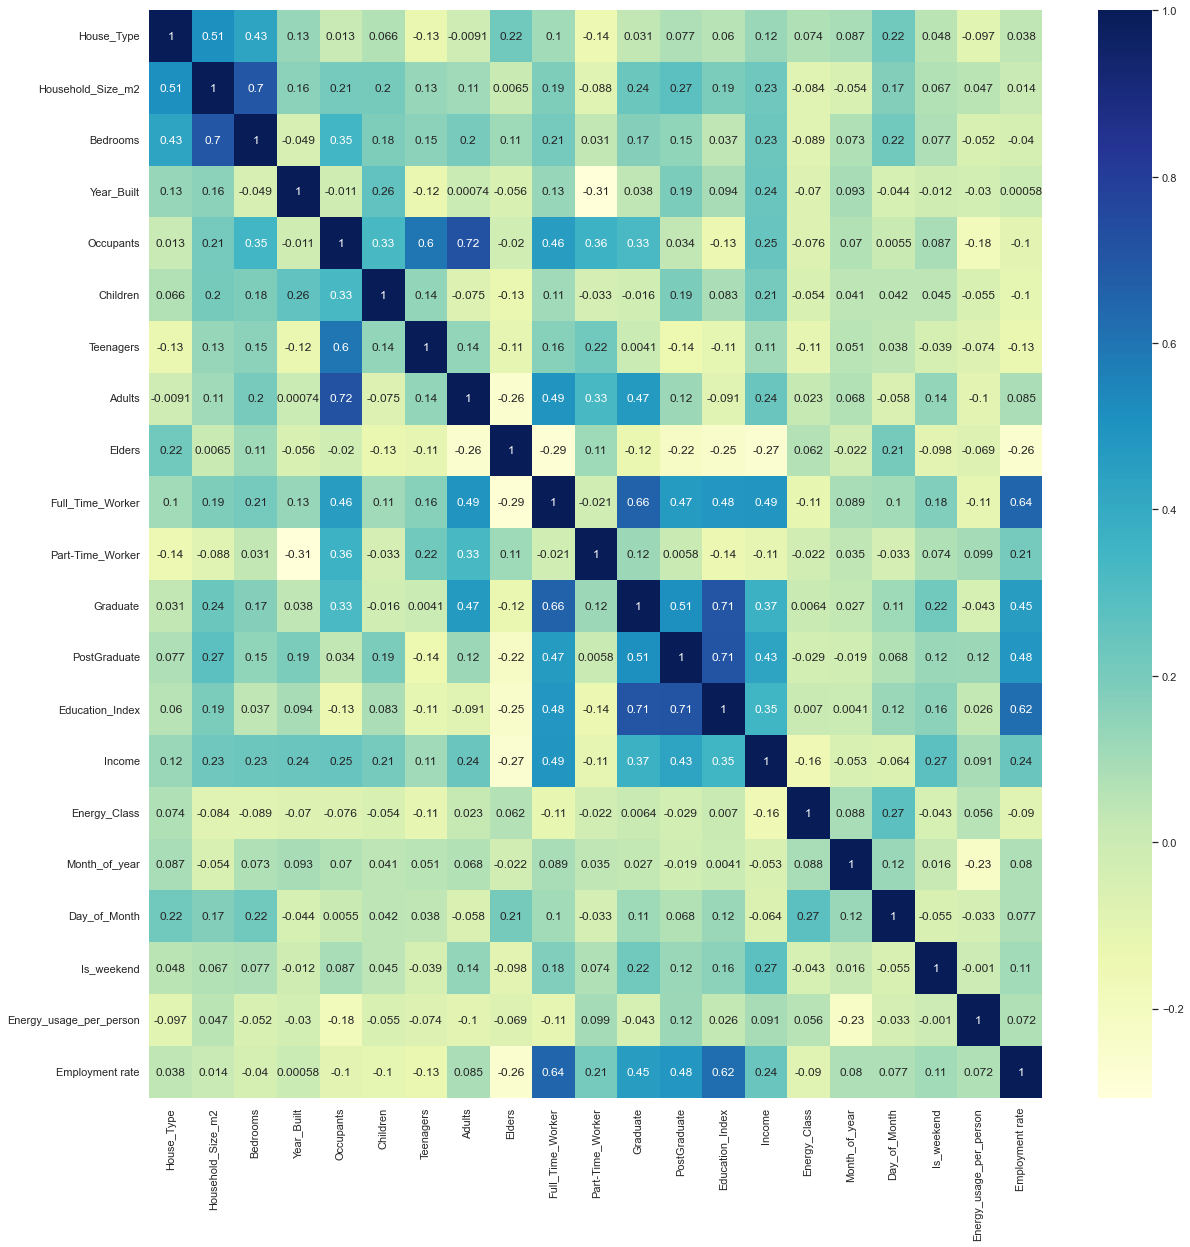

In [126]:

plt.figure(figsize=(20,20))
cors = X_train.corr()
sns.heatmap(cors, annot= True, cmap="YlGnBu")

<AxesSubplot:>

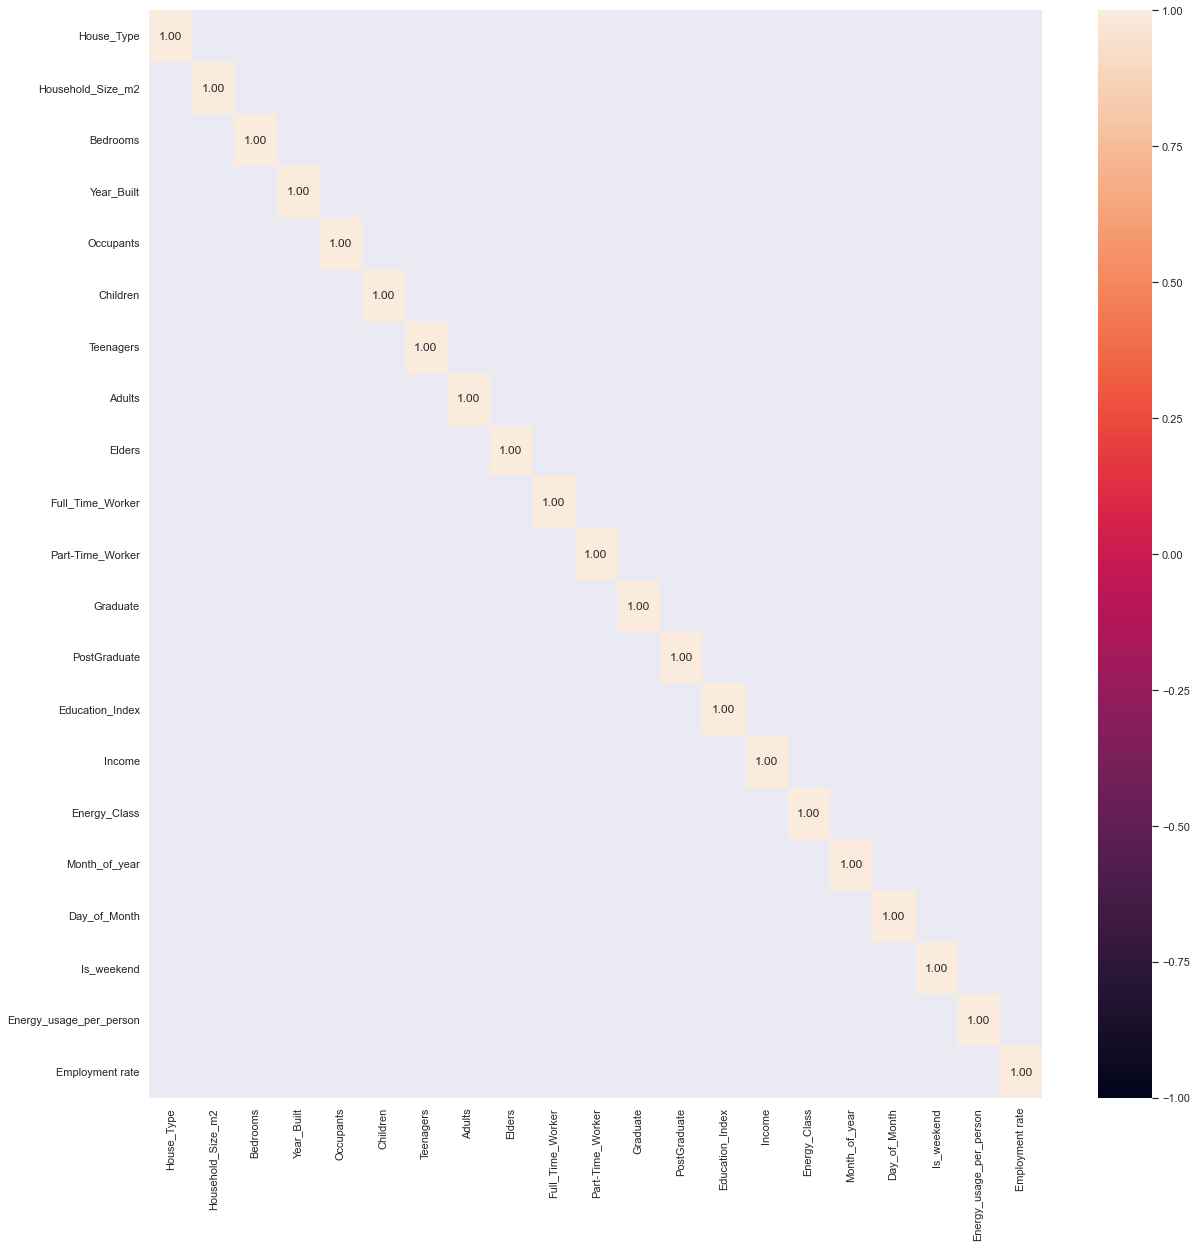

In [127]:
mask = cors[(cors >= 0.85)|(cors <= -0.85)]

plt.figure(figsize=(20,20))
sns.heatmap(mask, vmin=-1, vmax=1, annot=True, fmt='0.2f')

In [128]:
r = train.corr()['Kwh/day'].sort_values(ascending=False).drop('Kwh/day')
r

Energy_usage_per_person    0.699938
Occupants                  0.345801
Teenagers                  0.341860
Household_Size_m2          0.282776
Part-Time_Worker           0.255929
Children                   0.221752
Adults                     0.217147
Graduate                   0.171474
Bedrooms                   0.159056
Full_Time_Worker           0.142980
PostGraduate               0.141842
Is_weekend                 0.087523
Employment rate            0.043363
Education_Index            0.019564
Day_of_Month              -0.038188
Elders                    -0.096447
Month_of_year             -0.170723
Name: Kwh/day, dtype: float64

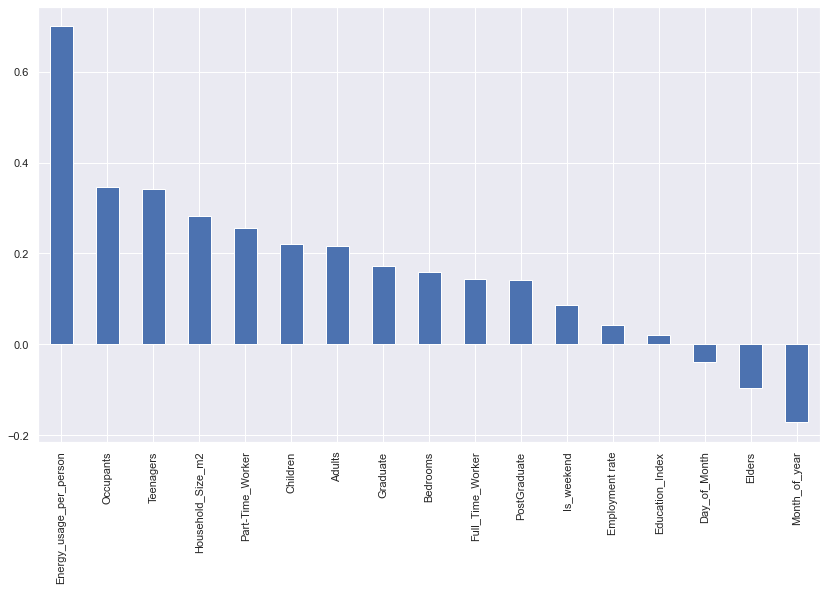

In [129]:
plt.figure(figsize=(14,8))
r.plot.bar()
plt.show()

In [130]:
decision_tree = DecisionTreeRegressor(max_depth = 10)
decision_tree.fit(X_train, y_train)
predictors = col2

coef = pd.Series(decision_tree.feature_importances_, predictors).sort_values(ascending=False)
coef.to_frame()

,0
Energy_usage_per_person,7.329541e-01
Occupants,2.278878e-01
Adults,1.425983e-02
Energy_Class,9.212170e-03
Month_of_year,7.069414e-03
Day_of_Month,2.731789e-03
Teenagers,1.647913e-03
Graduate,1.368404e-03
PostGraduate,9.519737e-04
Education_Index,8.004882e-04


<Figure size 1800x576 with 0 Axes>

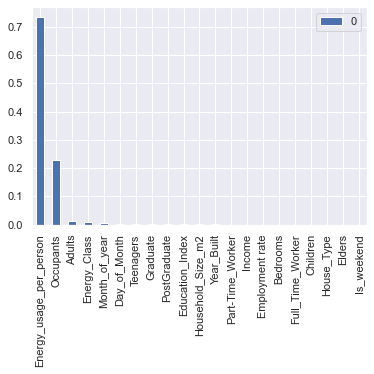

In [131]:
plt.figure(figsize=(25,8))
coef.to_frame().plot.bar(width=0.5)
plt.show()

## X_test Actions

In [132]:

def process(df):
    # Reset and clean the DataFrame
    df.reset_index(drop=True, inplace=True)
    df.dropna(inplace=True)
    df.drop_duplicates(keep='first', inplace=True)
    df.reset_index(drop=True, inplace=True)

    # Preprocess columns
    df['Bedrooms'] = df['Bedrooms'].astype('int64')
    df['Income'] = df['Income'].str.replace('€', '')
    df['Income'] = df['Income'].str.replace('άνω των', '')
    df['Income'] = df['Income'].str.replace(',', '')
    df['Income']=df['Income'].str.replace('600001','600001')
    df['Income']=df['Income'].str.replace(' 600001','600001')

    df['Month_of_year'] = df['Date'].dt.month
    df['Day_of_Month'] = df['Date'].dt.day
    df['Is_weekend'] = df['Date'].dt.dayofweek.isin([5, 6]).astype('int64')
    df['Kwh/day'] = round(df['Kwh/day'], 2)
    df['Energy_usage_per_person'] = round(df['Kwh/day'] / df['Occupants'], 2)
    df['Education_Index'] = round(df['Education_Index'], 2)
    df['Employment rate'] = round((df['Full_Time_Worker'] + df['Part-Time_Worker']) / df['Occupants'], 2)

    df = cap_outlier(df,'Kwh/day')

    X_test = df.drop(['Kwh/day','Date'], axis=1)
    y_test = df['Kwh/day']
    encoder= OrdinalEncoder()

    X_test[category]=encoder.fit_transform(X_test[category])
    col2 = X_test.columns

    X_test = scaler.fit_transform(X_test)

    X_test = pd.DataFrame(X_test, columns=col2)

    return X_test, y_test


In [133]:
X_test,y_test = process(test)

In [134]:
def model_to_use(input_ml_algo):
    if input_ml_algo == 'DT':
        model = DecisionTreeRegressor()
    elif input_ml_algo == 'RF':
        model = RandomForestRegressor()
    elif input_ml_algo == 'XGBC':
        model = XGBRegressor()
    elif input_ml_algo == 'LGBMC':
        model = LGBMRegressor()
    elif input_ml_algo=='LR':
        model=LinearRegression()
    elif input_ml_algo=='KNN':
        model=KNeighborsRegressor()
    return model

In [135]:
model_to_use('RF')

RandomForestRegressor()

In [136]:
def evaluate(model):
    y_train_pred = model.predict(X_train) #Train (Already seen this)
    y_pred = model.predict(X_test) 
    
    print('Train r2 score: ', r2_score(y_train,y_train_pred))
    print('Test r2 score: ', r2_score(y_test, y_pred))


    print('train_mse1: ', mean_squared_error(y_train,y_train_pred))
    print('test_mse1: ', mean_squared_error(y_test,y_pred))  

    plt.subplots(figsize=(8,5))
    plt.scatter(y_test,y_pred)
    plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, y_pred, 1))(np.unique(y_test)),c='r')
    plt.title('Predicted vs Actual')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.grid()
    plt.show()

Train r2 score:  0.9835282033439239
Test r2 score:  0.723047189889793
train_mse1:  0.9732351747420682
test_mse1:  8.948719540825477


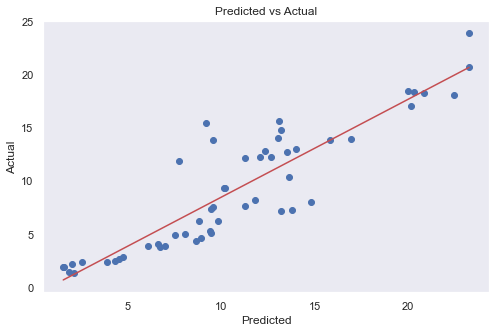

In [137]:
model1 = model_to_use("RF")
model1.fit(X_train, y_train)
evaluate(model1)

Train r2 score:  0.8196803086555018
Test r2 score:  0.25246749315493267
train_mse1:  10.65417877474601
test_mse1:  24.15378543638822


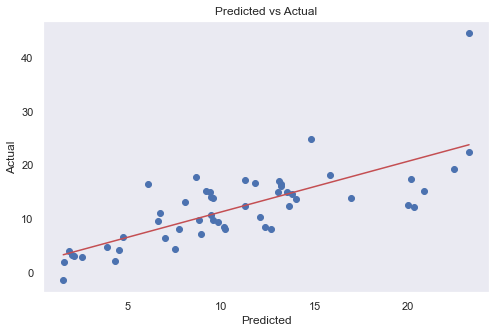

In [138]:
model2 = model_to_use("LR")
model2.fit(X_train, y_train)
evaluate(model2)

Train r2 score:  0.43581975798789174
Test r2 score:  -0.30582105813032046
train_mse1:  33.334557722222215
test_mse1:  42.19284294339622


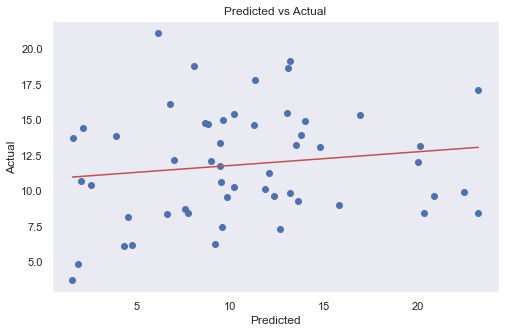

In [139]:
model3 = model_to_use("KNN")
model3.fit(X_train, y_train)
evaluate(model3)

Train r2 score:  1.0
Test r2 score:  0.627324731861044
train_mse1:  0.0
test_mse1:  12.04164150943396


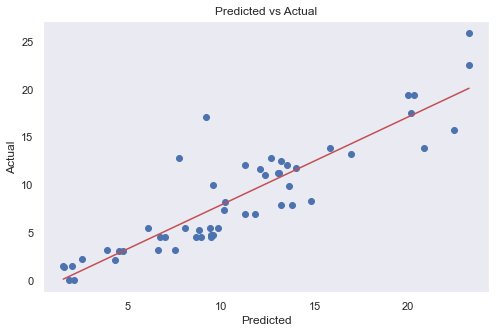

In [140]:
model4 = model_to_use("DT")
model4.fit(X_train, y_train)
evaluate(model4)

Train r2 score:  0.9476539894717645
Test r2 score:  0.5948797375897112
train_mse1:  3.0928610744295932
test_mse1:  13.089983117241845


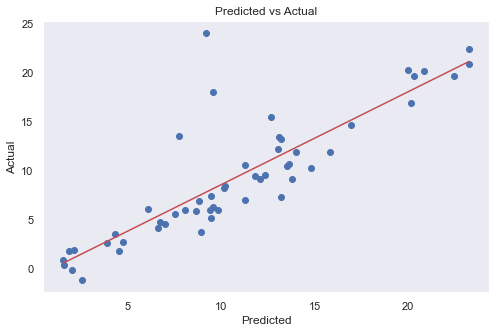

In [141]:
model5 = model_to_use("LGBMC")
model5.fit(X_train, y_train)
evaluate(model5)

Train r2 score:  0.9999999671976726
Test r2 score:  0.6936048507529033
train_mse1:  1.9381236638148034e-06
test_mse1:  9.90004130375344


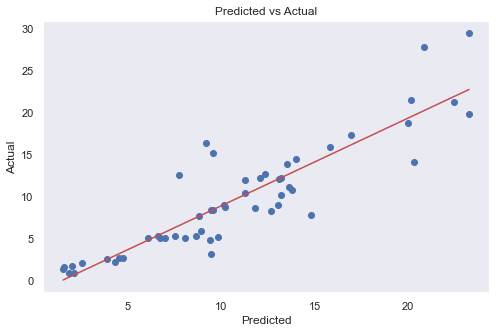

In [142]:
model6 = model_to_use("XGBC")
model6.fit(X_train, y_train)
evaluate(model6)

rain R2 score: 0.9999999671976726
Test R2 score: 0.6936048507529033
Train MSE: 1.9381236638148034e-06
Test MSE: 9.90004130375344

Interpretation:

The XGBoost model has an exceptionally high R2 score of 0.9999999671976726 on the training set. This indicates that the model explains approximately 99.99% of the variance in the target variable in the training data.
The test R2 score of 0.6936048507529033 is also relatively high, indicating that the model performs well on unseen data and explains approximately 69.36% of the variance in the target variable on the test set.
The low train mean squared error (MSE) of 1.9381236638148034e-06 indicates that the model has very little error on the training set, suggesting a good fit to the training data.
The test MSE of 9.90004130375344 indicates a reasonably low error on the test set, although it is higher than the train MSE. This suggests that there might be some degree of overfitting, as the model might be fitting the training data too closely.
Overall, the XGBoost model demonstrates excellent predictive performance on both the training and test sets, with an almost perfect R2 score on the training set and a high R2 score on the test set. However, it's important to carefully evaluate the potential overfitting and generalization of the model, as indicated by the lower but still relatively good performance on the test set and the higher test MSE compared to the train MSE.







XGBoost:

The XGBoost Classifier achieved a relatively high R2 score of 0.6936 on the test set, indicating that it explains approximately 69.36% of the variance in the target variable.
The model's train R2 score of 0.9999 suggests a very good fit to the training data, which could potentially indicate overfitting to some extent.
The train and test mean squared errors (MSE) of 1.9381e-06 and 9.9000, respectively, indicate very low error values on the training set and a reasonably low error on the test set.
XGBoost is known for its exceptional performance and robustness. It can handle both linear and non-linear relationships in the data, which might have contributed to its good performance.
Similar to Random Forest, interpreting XGBoost models can be challenging due to the ensemble of weak learners and the complex interactions between them. You can use techniques like feature importance plots and SHAP (SHapley Additive exPlanations) values to gain insights into the relative importance of the features and their impact on the model's predictions.
Overall, both the Random Forest and XGBoost models performed well on the given data, with reasonably high R2 scores and relatively low MSE values. While Random Forest provides good interpretability through feature importance plots, XGBoost offers exceptional predictive performance but can be more challenging to interpret due to its complex ensemble nature.






Regenerate response
Send a message.


## EXPLORATORY DATA ANALYSIS

In [487]:
eda=pd.read_excel("energy.xlsx")

In [488]:
eda.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,House_Type,Household_Size_m2,Bedrooms,Year_Built,Occupants,Children,Teenagers,Adults,Elders,Full_Time_Worker,Part-Time_Worker,Graduate,PostGraduate,Education_Index,Income,Energy_Class,Date,Kwh/day
1,Appartment,36,1,0 - 5,1,0,0,1,0,1,0,1,0,0.944444,"10,001€ - 20,000€",Sometimes,2022-01-12 00:00:00,3.024
2,Appartment,36,1,0 - 5,1,0,0,1,0,1,0,1,0,0.944444,"10,001€ - 20,000€",Sometimes,2021-09-09 00:00:00,2.788235
3,Appartment,95,2,6 - 15,4,1,1,2,0,2,0,2,1,0.972222,"άνω των 60,0001€",Often or Always,2021-01-14 00:00:00,11.52
4,Appartment,95,2,6 - 15,4,1,1,2,0,2,0,2,1,0.972222,"άνω των 60,0001€",Often or Always,2021-09-12 00:00:00,9.504132


In [489]:
dt.dtypes

House_Type                   object
Household_Size_m2             int64
Bedrooms                    float64
Year_Built                   object
Occupants                     int64
Children                      int64
Teenagers                     int64
Adults                        int64
Elders                        int64
Full_Time_Worker              int64
Part-Time_Worker              int64
Graduate                      int64
PostGraduate                  int64
Education_Index             float64
Income                       object
Energy_Class                 object
Date                 datetime64[ns]
Kwh/day                     float64
dtype: object

In [490]:
eda.columns=eda.iloc[0]
eda=eda[1:]

In [491]:
eda.reset_index(drop=True, inplace= True)
eda.head(30)

,House_Type,Household_Size_m2,Bedrooms,Year_Built,Occupants,Children,Teenagers,Adults,Elders,Full_Time_Worker,Part-Time_Worker,Graduate,PostGraduate,Education_Index,Income,Energy_Class,Date,Kwh/day
0,Appartment,36,1,0 - 5,1,0,0,1,0,1,0,1,0,0.944444,"10,001€ - 20,000€",Sometimes,2022-01-12 00:00:00,3.024
1,Appartment,36,1,0 - 5,1,0,0,1,0,1,0,1,0,0.944444,"10,001€ - 20,000€",Sometimes,2021-09-09 00:00:00,2.788235
2,Appartment,95,2,6 - 15,4,1,1,2,0,2,0,2,1,0.972222,"άνω των 60,0001€",Often or Always,2021-01-14 00:00:00,11.52
3,Appartment,95,2,6 - 15,4,1,1,2,0,2,0,2,1,0.972222,"άνω των 60,0001€",Often or Always,2021-09-12 00:00:00,9.504132
4,Appartment,80,2,6 - 15,3,1,0,2,0,2,0,2,1,0.972222,"40,000€ - 60,000€",Often or Always,2022-02-22 00:00:00,9.458333
5,Appartment,48,1,0 - 5,2,0,0,2,0,2,0,2,1,0.972222,"20,001€ - 40,000€",Rarely,2022-02-10 00:00:00,4.752066
6,Appartment,48,1,0 - 5,2,0,0,2,0,2,0,2,1,0.972222,"20,001€ - 40,000€",Rarely,2021-06-10 00:00:00,3.733333
7,Family House,92,2,30+,2,0,0,1,1,0,0,0,0,0.833333,"0 - 10,000€",Rarely,2022-01-20 00:00:00,12.793651
8,Family House,92,2,30+,2,0,0,1,1,0,0,0,0,0.833333,"0 - 10,000€",Rarely,2021-07-15 00:00:00,10.175439
9,Appartment,100,3,16 - 30,4,0,1,3,0,1,1,2,0,0.907407,"20,001€ - 40,000€",Often or Always,2022-01-04 00:00:00,5.395349


In [492]:
eda.dtypes

0
House_Type           object
Household_Size_m2    object
Bedrooms             object
Year_Built           object
Occupants            object
Children             object
Teenagers            object
Adults               object
Elders               object
Full_Time_Worker     object
Part-Time_Worker     object
Graduate             object
PostGraduate         object
Education_Index      object
Income               object
Energy_Class         object
Date                 object
Kwh/day              object
dtype: object

In [493]:
eda['Household_Size_m2']=eda['Household_Size_m2'].astype('int64')
eda['Occupants']=eda['Occupants'].astype('int64')
eda['Children']=eda['Children'].astype('int64')
eda['Adults']=eda['Adults'].astype('int64')
eda['Teenagers']= eda['Teenagers'].astype('int64')
eda['Elders']= eda['Elders'].astype('int64')
eda['Full_Time_Worker']= eda['Full_Time_Worker'].astype('int64')
eda['Part-Time_Worker']= eda['Part-Time_Worker'].astype('int64')
eda['Graduate']= eda['Graduate'].astype('int64')
eda['PostGraduate']= eda['PostGraduate'].astype('int64')
eda['Education_Index']= eda['Education_Index'].astype('float64')
eda['Kwh/day']=eda['Kwh/day'].astype('float64')
eda['Date']=pd.to_datetime(eda['Date'])
eda["House_Type"]=eda["House_Type"].replace("Appartment","Apartment")

In [494]:
eda.dtypes

0
House_Type                   object
Household_Size_m2             int64
Bedrooms                     object
Year_Built                   object
Occupants                     int64
Children                      int64
Teenagers                     int64
Adults                        int64
Elders                        int64
Full_Time_Worker              int64
Part-Time_Worker              int64
Graduate                      int64
PostGraduate                  int64
Education_Index             float64
Income                       object
Energy_Class                 object
Date                 datetime64[ns]
Kwh/day                     float64
dtype: object

In [495]:
eda.dropna(inplace=True)

In [496]:
eda.isnull().sum().sum()

0

In [497]:
eda.duplicated().sum()

4

In [498]:
eda.drop_duplicates(keep='first',inplace=True)
eda.reset_index(drop=True,inplace=True)
eda.head()

,House_Type,Household_Size_m2,Bedrooms,Year_Built,Occupants,Children,Teenagers,Adults,Elders,Full_Time_Worker,Part-Time_Worker,Graduate,PostGraduate,Education_Index,Income,Energy_Class,Date,Kwh/day
0,Apartment,36,1,0 - 5,1,0,0,1,0,1,0,1,0,0.944444,"10,001€ - 20,000€",Sometimes,2022-01-12,3.024000
1,Apartment,36,1,0 - 5,1,0,0,1,0,1,0,1,0,0.944444,"10,001€ - 20,000€",Sometimes,2021-09-09,2.788235
2,Apartment,95,2,6 - 15,4,1,1,2,0,2,0,2,1,0.972222,"άνω των 60,0001€",Often or Always,2021-01-14,11.520000
3,Apartment,95,2,6 - 15,4,1,1,2,0,2,0,2,1,0.972222,"άνω των 60,0001€",Often or Always,2021-09-12,9.504132
4,Apartment,80,2,6 - 15,3,1,0,2,0,2,0,2,1,0.972222,"40,000€ - 60,000€",Often or Always,2022-02-22,9.458333


In [499]:
eda.duplicated().sum()

0

In [500]:
eda['Bedrooms']=eda['Bedrooms'].astype('int64')
eda.dtypes

0
House_Type                   object
Household_Size_m2             int64
Bedrooms                      int64
Year_Built                   object
Occupants                     int64
Children                      int64
Teenagers                     int64
Adults                        int64
Elders                        int64
Full_Time_Worker              int64
Part-Time_Worker              int64
Graduate                      int64
PostGraduate                  int64
Education_Index             float64
Income                       object
Energy_Class                 object
Date                 datetime64[ns]
Kwh/day                     float64
dtype: object

In [501]:
eda['Year_Built']=eda['Year_Built'].str.replace("30+","30")
eda['Year_Built']=eda['Year_Built'].str.replace("+","")
eda['Year_Built']=eda['Year_Built'].str.replace("16 - 31 - 36","16 - 30")
eda['Income']=eda['Income'].str.replace('€','')
eda["Income"]=eda["Income"].str.replace('άνω των','')
eda['Income']=eda['Income'].str.replace(',','')
eda['Income']=eda['Income'].str.replace('600001','600001')
eda['Income']=eda['Income'].str.replace(' 600001','600001')

C:\Users\emmanul\AppData\Local\Temp\ipykernel_10740\414102042.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  eda['Year_Built']=eda['Year_Built'].str.replace("30+","30")
C:\Users\emmanul\AppData\Local\Temp\ipykernel_10740\414102042.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  eda['Year_Built']=eda['Year_Built'].str.replace("+","")


In [502]:
eda.head(10)

,House_Type,Household_Size_m2,Bedrooms,Year_Built,Occupants,Children,Teenagers,Adults,Elders,Full_Time_Worker,Part-Time_Worker,Graduate,PostGraduate,Education_Index,Income,Energy_Class,Date,Kwh/day
0,Apartment,36,1,0 - 5,1,0,0,1,0,1,0,1,0,0.944444,10001 - 20000,Sometimes,2022-01-12,3.024000
1,Apartment,36,1,0 - 5,1,0,0,1,0,1,0,1,0,0.944444,10001 - 20000,Sometimes,2021-09-09,2.788235
2,Apartment,95,2,6 - 15,4,1,1,2,0,2,0,2,1,0.972222,600001,Often or Always,2021-01-14,11.520000
3,Apartment,95,2,6 - 15,4,1,1,2,0,2,0,2,1,0.972222,600001,Often or Always,2021-09-12,9.504132
4,Apartment,80,2,6 - 15,3,1,0,2,0,2,0,2,1,0.972222,40000 - 60000,Often or Always,2022-02-22,9.458333
5,Apartment,48,1,0 - 5,2,0,0,2,0,2,0,2,1,0.972222,20001 - 40000,Rarely,2022-02-10,4.752066
6,Apartment,48,1,0 - 5,2,0,0,2,0,2,0,2,1,0.972222,20001 - 40000,Rarely,2021-06-10,3.733333
7,Family House,92,2,30,2,0,0,1,1,0,0,0,0,0.833333,0 - 10000,Rarely,2022-01-20,12.793651
8,Family House,92,2,30,2,0,0,1,1,0,0,0,0,0.833333,0 - 10000,Rarely,2021-07-15,10.175439
9,Apartment,100,3,16 - 30,4,0,1,3,0,1,1,2,0,0.907407,20001 - 40000,Often or Always,2022-01-04,5.395349


In [503]:
eda['Month_of_year']=eda['Date'].dt.month
eda['Day_of_Month']=eda['Date'].dt.day
eda['Is_weekend']=eda['Date'].dt.dayofweek.isin([5,6]).astype('int64')
eda['Kwh/day']=round(eda['Kwh/day'],2)
eda['Energy_usage_per_person']=round(eda['Kwh/day']/eda['Occupants'],2)
eda.head(10)


,House_Type,Household_Size_m2,Bedrooms,Year_Built,Occupants,Children,Teenagers,Adults,Elders,Full_Time_Worker,Part-Time_Worker,Graduate,PostGraduate,Education_Index,Income,Energy_Class,Date,Kwh/day,Month_of_year,Day_of_Month,Is_weekend,Energy_usage_per_person
0,Apartment,36,1,0 - 5,1,0,0,1,0,1,0,1,0,0.944444,10001 - 20000,Sometimes,2022-01-12,3.02,1,12,0,3.02
1,Apartment,36,1,0 - 5,1,0,0,1,0,1,0,1,0,0.944444,10001 - 20000,Sometimes,2021-09-09,2.79,9,9,0,2.79
2,Apartment,95,2,6 - 15,4,1,1,2,0,2,0,2,1,0.972222,600001,Often or Always,2021-01-14,11.52,1,14,0,2.88
3,Apartment,95,2,6 - 15,4,1,1,2,0,2,0,2,1,0.972222,600001,Often or Always,2021-09-12,9.50,9,12,1,2.38
4,Apartment,80,2,6 - 15,3,1,0,2,0,2,0,2,1,0.972222,40000 - 60000,Often or Always,2022-02-22,9.46,2,22,0,3.15
5,Apartment,48,1,0 - 5,2,0,0,2,0,2,0,2,1,0.972222,20001 - 40000,Rarely,2022-02-10,4.75,2,10,0,2.38
6,Apartment,48,1,0 - 5,2,0,0,2,0,2,0,2,1,0.972222,20001 - 40000,Rarely,2021-06-10,3.73,6,10,0,1.86
7,Family House,92,2,30,2,0,0,1,1,0,0,0,0,0.833333,0 - 10000,Rarely,2022-01-20,12.79,1,20,0,6.40
8,Family House,92,2,30,2,0,0,1,1,0,0,0,0,0.833333,0 - 10000,Rarely,2021-07-15,10.18,7,15,0,5.09
9,Apartment,100,3,16 - 30,4,0,1,3,0,1,1,2,0,0.907407,20001 - 40000,Often or Always,2022-01-04,5.40,1,4,0,1.35


In [504]:
eda['Income'].unique()

array(['10001 - 20000', '600001', '40000 - 60000', '20001 - 40000',
       '0 - 10000'], dtype=object)

In [505]:
eda['Year_Built'].unique()

array(['0 - 5', '6 - 15', '30', '16 - 30'], dtype=object)

In [506]:
eda['Education_Index']= round(eda['Education_Index'],2)
eda['Employment rate']= round((eda['Full_Time_Worker'] + eda['Part-Time_Worker'])/eda['Occupants'],2)


eda.head(20)

,House_Type,Household_Size_m2,Bedrooms,Year_Built,Occupants,Children,Teenagers,Adults,Elders,Full_Time_Worker,Part-Time_Worker,Graduate,PostGraduate,Education_Index,Income,Energy_Class,Date,Kwh/day,Month_of_year,Day_of_Month,Is_weekend,Energy_usage_per_person,Employment rate
0,Apartment,36,1,0 - 5,1,0,0,1,0,1,0,1,0,0.94,10001 - 20000,Sometimes,2022-01-12,3.02,1,12,0,3.02,1.00
1,Apartment,36,1,0 - 5,1,0,0,1,0,1,0,1,0,0.94,10001 - 20000,Sometimes,2021-09-09,2.79,9,9,0,2.79,1.00
2,Apartment,95,2,6 - 15,4,1,1,2,0,2,0,2,1,0.97,600001,Often or Always,2021-01-14,11.52,1,14,0,2.88,0.50
3,Apartment,95,2,6 - 15,4,1,1,2,0,2,0,2,1,0.97,600001,Often or Always,2021-09-12,9.50,9,12,1,2.38,0.50
4,Apartment,80,2,6 - 15,3,1,0,2,0,2,0,2,1,0.97,40000 - 60000,Often or Always,2022-02-22,9.46,2,22,0,3.15,0.67
5,Apartment,48,1,0 - 5,2,0,0,2,0,2,0,2,1,0.97,20001 - 40000,Rarely,2022-02-10,4.75,2,10,0,2.38,1.00
6,Apartment,48,1,0 - 5,2,0,0,2,0,2,0,2,1,0.97,20001 - 40000,Rarely,2021-06-10,3.73,6,10,0,1.86,1.00
7,Family House,92,2,30,2,0,0,1,1,0,0,0,0,0.83,0 - 10000,Rarely,2022-01-20,12.79,1,20,0,6.40,0.00
8,Family House,92,2,30,2,0,0,1,1,0,0,0,0,0.83,0 - 10000,Rarely,2021-07-15,10.18,7,15,0,5.09,0.00
9,Apartment,100,3,16 - 30,4,0,1,3,0,1,1,2,0,0.91,20001 - 40000,Often or Always,2022-01-04,5.40,1,4,0,1.35,0.50


C:\Users\emmanul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Kwh/day'>

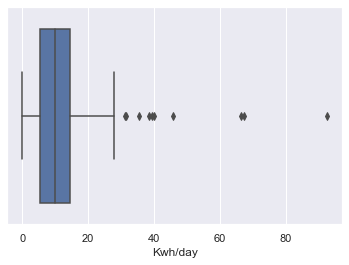

In [507]:
sns.boxplot(eda['Kwh/day'])

C:\Users\emmanul\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Kwh/day', ylabel='Density'>

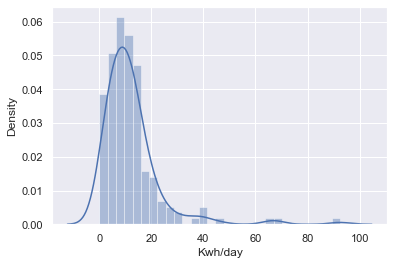

In [508]:
sns.distplot(eda['Kwh/day'])

In [509]:
def cap_outlier(data,var):
    q1,q3=np.percentile(data[var],[25,75])
    iqr=q3-q1
    lower=q1-1.5*iqr
    upper=q3+1.5*iqr
    
    data[var].values[data[var].values>upper]=upper
    data[var].values[data[var].values<lower]=lower
    data.reset_index(drop=True,inplace=True)
    return data

In [510]:
eda=cap_outlier(eda,'Kwh/day')

C:\Users\emmanul\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Kwh/day', ylabel='Density'>

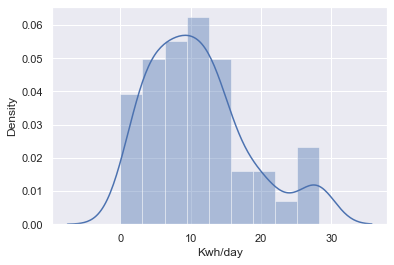

In [511]:
sns.distplot(eda['Kwh/day'])

C:\Users\emmanul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Kwh/day'>

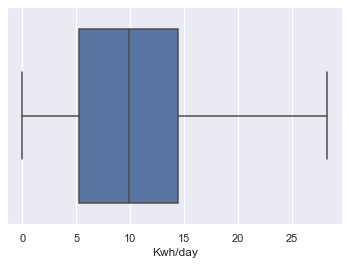

In [512]:
sns.boxplot(eda['Kwh/day'])

0 House_Type  Household_Size_m2  Bedrooms Year_Built  Occupants  Children  \
0  Apartment                 36         1      0 - 5          1         0   
1  Apartment                 36         1      0 - 5          1         0   
2  Apartment                 95         2     6 - 15          4         1   
3  Apartment                 95         2     6 - 15          4         1   
4  Apartment                 80         2     6 - 15          3         1   

0  Teenagers  Adults  Elders  Full_Time_Worker  Part-Time_Worker  Graduate  \
0          0       1       0                 1                 0         1   
1          0       1       0                 1                 0         1   
2          1       2       0                 2                 0         2   
3          1       2       0                 2                 0         2   
4          0       2       0                 2                 0         2   

0  PostGraduate  Education_Index         Income     Energy_Class    

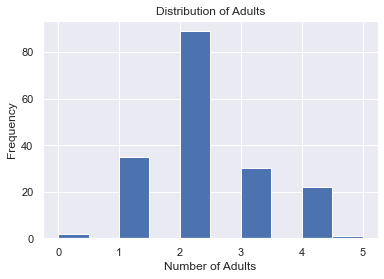

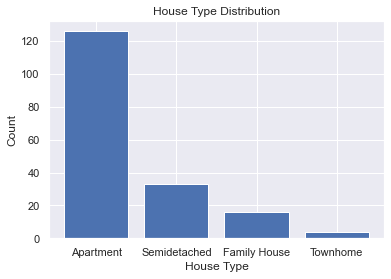

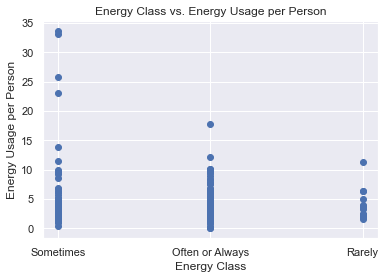

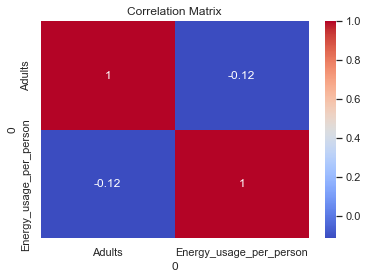

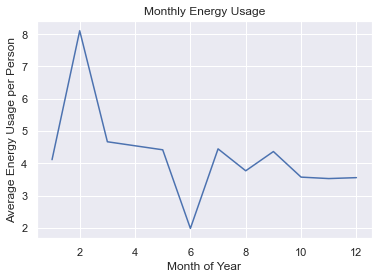

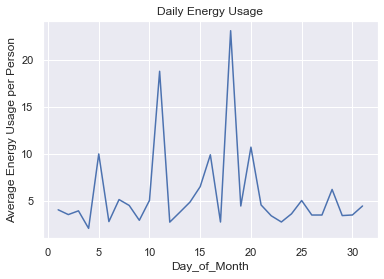

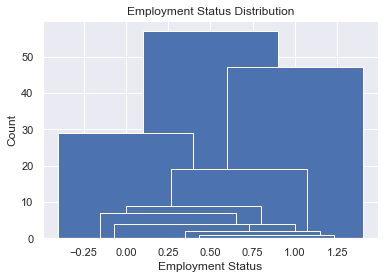

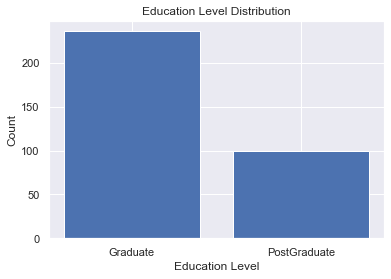

In [513]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display the first few rows of the dataset
print(eda.head())

# Check the basic information of the dataset
print(eda.info())

# Summary statistics of numeric columns
print(eda.describe())

# Plot a histogram of Adults column
plt.hist(eda['Adults'])
plt.xlabel('Number of Adults')
plt.ylabel('Frequency')
plt.title('Distribution of Adults')
plt.show()



# Bar chart of House_Type
house_type_counts = eda['House_Type'].value_counts()
plt.bar(house_type_counts.index, house_type_counts.values)
plt.xlabel('House Type')
plt.ylabel('Count')
plt.title('House Type Distribution')
plt.show()

# Scatter plot of Energy_Class vs. Energy_usage_per_person
plt.scatter(eda['Energy_Class'], eda['Energy_usage_per_person'])
plt.xlabel('Energy Class')
plt.ylabel('Energy Usage per Person')
plt.title('Energy Class vs. Energy Usage per Person')
plt.show()

# Correlation matrix of numeric columns
numeric_columns = ['Adults', 'Energy_Class', 'Energy_usage_per_person']
numeric_data = eda[numeric_columns]
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()

# Time-based analysis (assuming Date is in datetime format)
eda['Date'] = pd.to_datetime(eda['Date'])
eda['Month_of_year'] = eda['Date'].dt.month
monthly_energy_usage = eda.groupby('Month_of_year')['Energy_usage_per_person'].mean()
plt.plot(monthly_energy_usage.index, monthly_energy_usage.values)
plt.xlabel('Month of Year')
plt.ylabel('Average Energy Usage per Person')
plt.title('Monthly Energy Usage')
plt.show()

eda['Date'] = pd.to_datetime(eda['Date'])
eda['Day_of_Month'] = eda['Date'].dt.day
monthly_energy_usage = eda.groupby('Day_of_Month')['Energy_usage_per_person'].mean()
plt.plot(monthly_energy_usage.index, monthly_energy_usage.values)
plt.xlabel('Day_of_Month')
plt.ylabel('Average Energy Usage per Person')
plt.title('Daily Energy Usage')
plt.show()

# Bar chart of Employment
employment_counts = eda['Employment rate'].value_counts()
plt.bar(employment_counts.index, employment_counts.values)
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.title('Employment Status Distribution')
plt.show()

# Bar chart of Graduate and PostGraduate
education_counts = eda[['Graduate', 'PostGraduate']].sum()
plt.bar(education_counts.index, education_counts.values)
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Education Level Distribution')
plt.show()

# Additional analysis and visualization as per your requirements



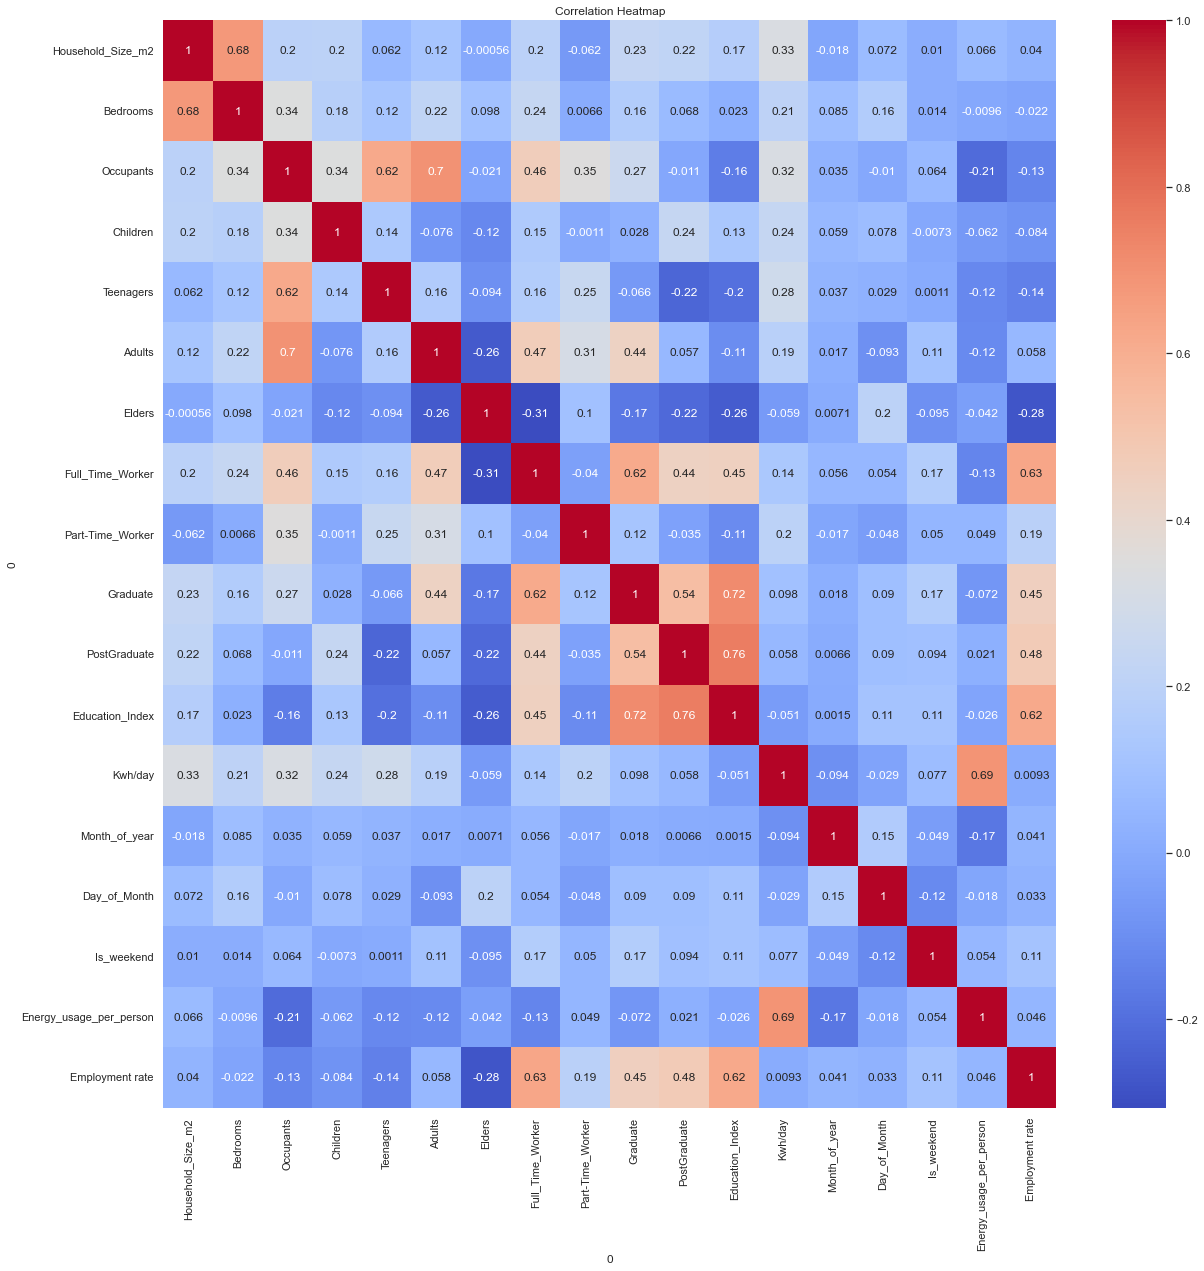

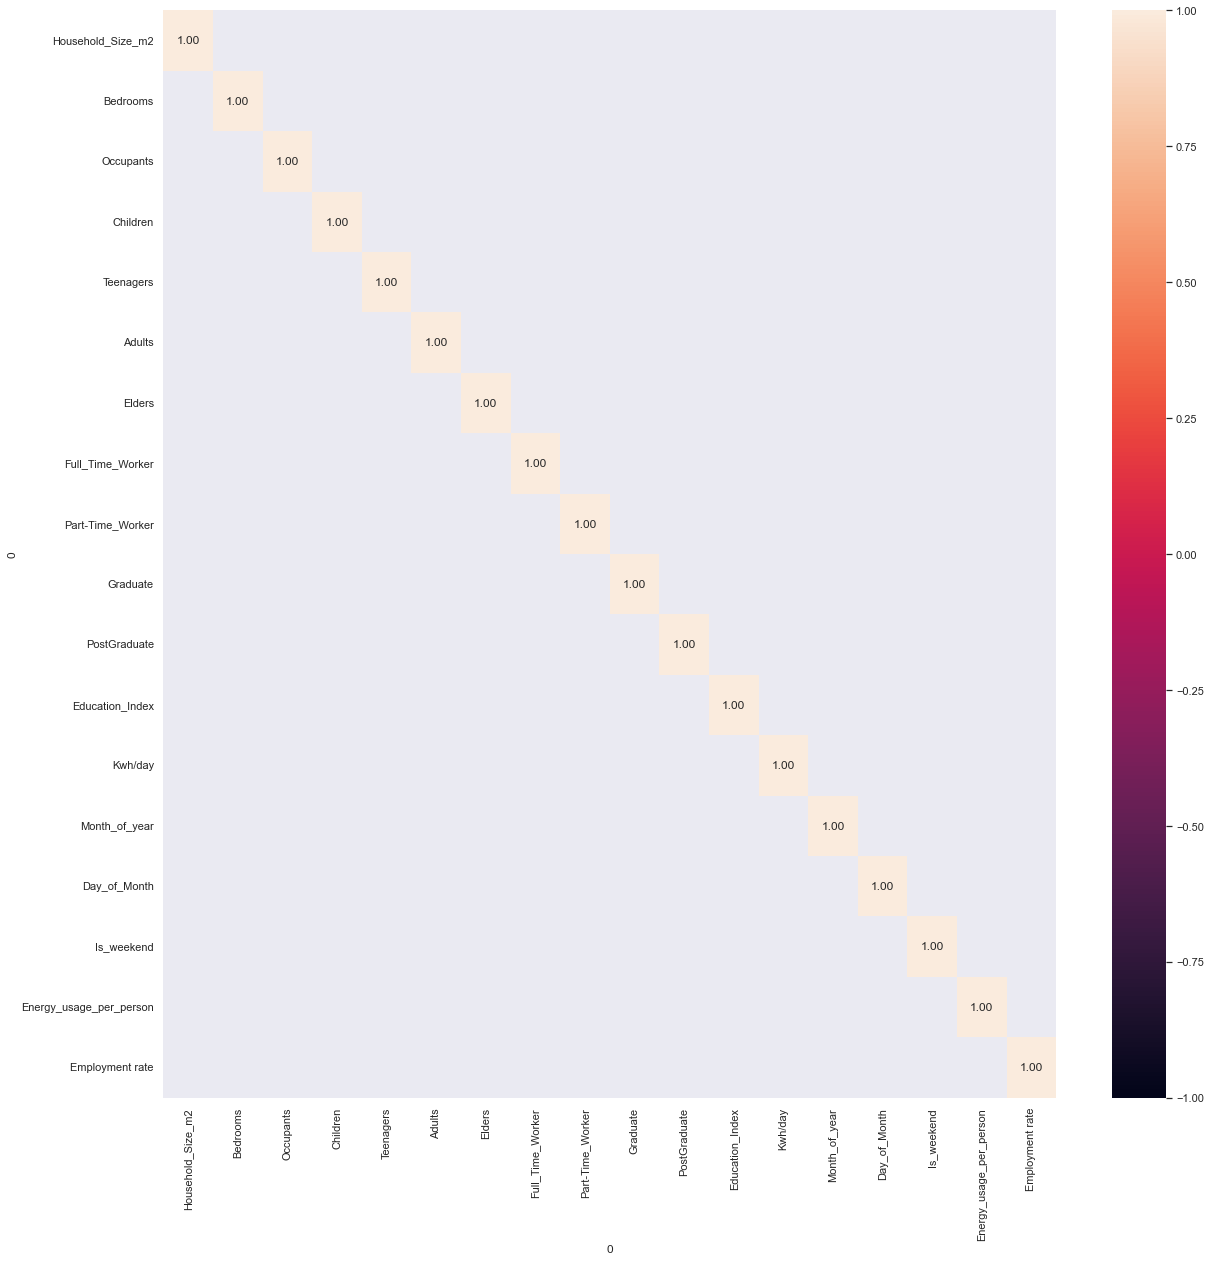

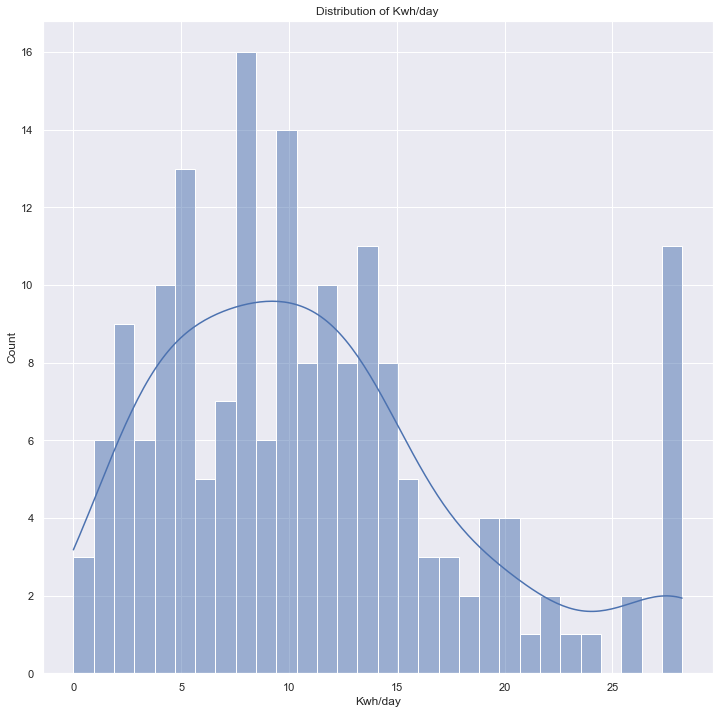

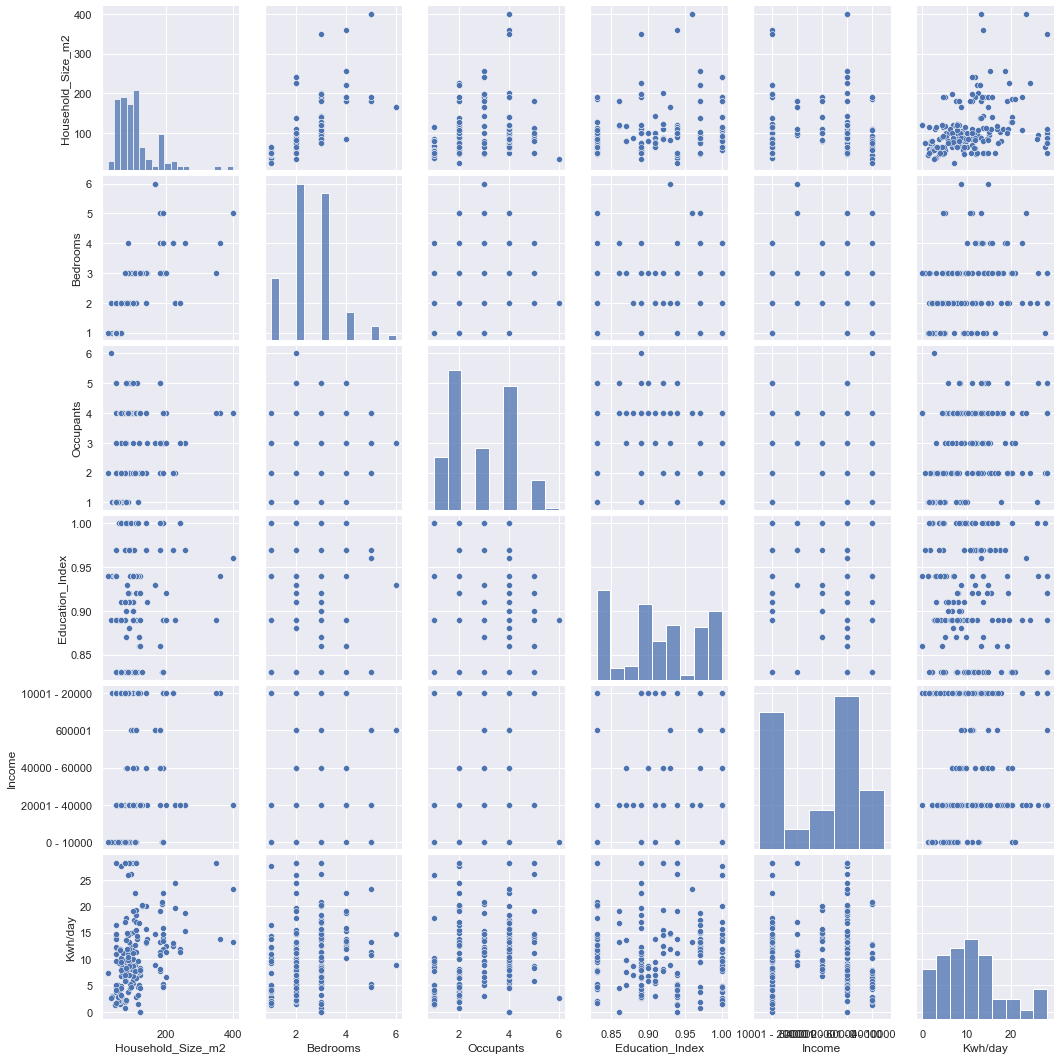

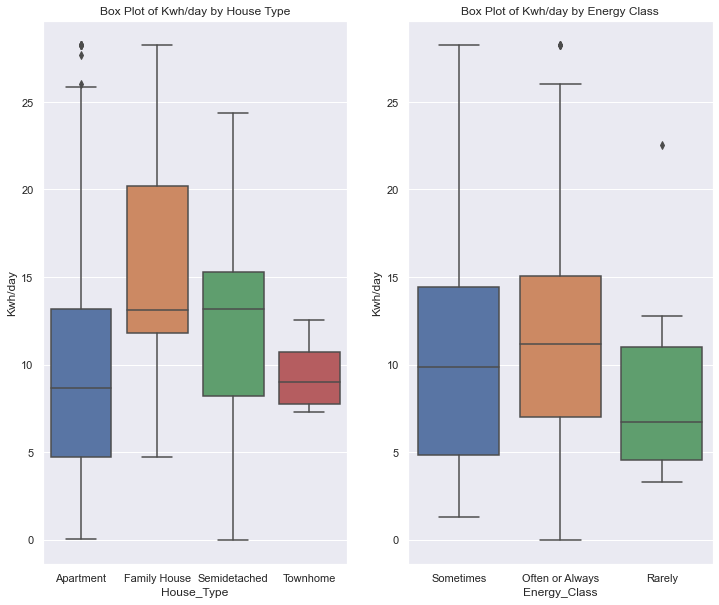

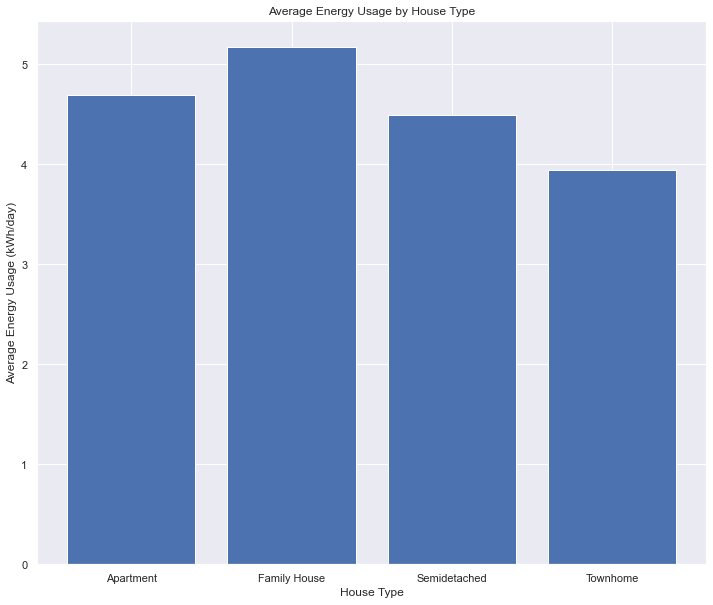

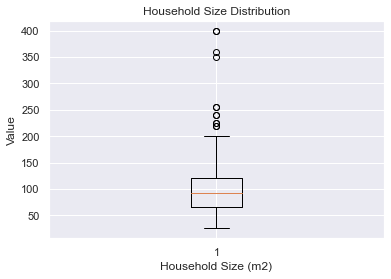

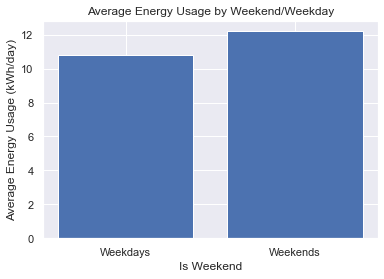

<Figure size 432x288 with 0 Axes>

In [514]:

# Correlation heatmap
correlation = eda.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

mask = correlation[(correlation >= 0.85)|(correlation <= -0.85)]

plt.figure(figsize=(20,20))
sns.heatmap(mask, vmin=-1, vmax=1, annot=True, fmt='0.2f')

# Distribution of target variable
plt.figure(figsize=(12, 12))
sns.histplot(eda['Kwh/day'], bins=30, kde=True)
plt.title('Distribution of Kwh/day')
plt.xlabel('Kwh/day')
plt.ylabel('Count')
plt.show()

# Scatter plot matrix
sns.pairplot(eda, vars=['Household_Size_m2', 'Bedrooms', 'Occupants', 'Education_Index', 'Income', 'Kwh/day'])
plt.show()

# Box plots
plt.figure(figsize=(12, 10))
plt.subplot(1, 2, 1)
sns.boxplot(x='House_Type', y='Kwh/day', data=eda)
plt.title('Box Plot of Kwh/day by House Type')

plt.subplot(1, 2, 2)
sns.boxplot(x='Energy_Class', y='Kwh/day', data=eda)
plt.title('Box Plot of Kwh/day by Energy Class')

# Calculate the average energy usage (kWh/day) by house type
avg_energy_usage = eda.groupby('House_Type')['Energy_usage_per_person'].mean()

# Plot the average energy usage by house type
plt.figure(figsize=(12,10))
plt.bar(avg_energy_usage.index, avg_energy_usage.values)
plt.xlabel('House Type')
plt.ylabel('Average Energy Usage (kWh/day)')
plt.title('Average Energy Usage by House Type')
plt.show()

# Box plot of Household_Size_m2
plt.boxplot(eda['Household_Size_m2'])
plt.xlabel('Household Size (m2)')
plt.ylabel('Value')
plt.title('Household Size Distribution')
plt.show()

# Group the data by the 'Is_weekend' column and calculate the average energy usage (kWh/day)
avg_energy_usage = eda.groupby('Is_weekend')['Kwh/day'].mean()

# Plot the energy usage based on the 'Is_weekend' column
plt.bar(avg_energy_usage.index, avg_energy_usage.values)
plt.xlabel('Is Weekend')
plt.ylabel('Average Energy Usage (kWh/day)')
plt.title('Average Energy Usage by Weekend/Weekday')
plt.xticks([0, 1], ['Weekdays', 'Weekends'])  # Customizing the x-axis labels
plt.show()


plt.tight_layout()
plt.show()